# EDA 2016

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
color = sns.color_palette()

In [3]:
cur_path = '/Users/sonalichaudhari/Desktop/ADS_Project/Data'

In [4]:
d = pd.read_csv(open(cur_path+'/Data2016_Uncleaned.csv','rU'), encoding='utf-8')

In [5]:
d.shape

(5617658, 109)

In [6]:
missing_data = d.isnull().sum().to_frame(name='Missing_Count').reset_index()
missing_data['Missing_percent'] = (missing_data['Missing_Count']/d.shape[0])*100
missing_data = missing_data.sort_values(by='Missing_percent', axis=0, ascending=True)
features = missing_data['index'][(missing_data.Missing_percent <98)]
len(features)

61

In [7]:
# Missing Data percentage Graph
fig, ax = plt.subplots(figsize=(20,40))
ax.barh(range(d.shape[1]), missing_data.Missing_percent.values, align='center',color='Red')

ax.set_yticks(range(d.shape[1]))
ax.set_yticklabels(missing_data['index'].values,rotation =0,linespacing =20, fontsize =10)
ax.invert_yaxis()  

ax.set_xlabel('Percentage of Missing Data in each Column',fontsize=20, color='red')
ax.set_ylabel('Columns',fontsize=14, color='red')
ax.set_title('Missing Data',fontsize=16, color='red')

#plt.show()

In [8]:
# Considering only the columns having 98% or more data
df = d[features]

In [9]:
df.shape

(5617658, 61)

In [35]:
df.columns

Index(['index', 'Year', 'DestCityMarketID', 'Dest', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac',
       'DestAirportSeqID', 'CRSDepTime', 'CRSArrTime', 'ArrTimeBlk',
       'Cancelled', 'Diverted', 'Flights', 'DistanceGroup',
       'DivAirportLandings', 'DepTimeBlk', 'DestAirportID', 'Distance',
       'OriginStateName', 'OriginWac', 'Month', 'DayofMonth', 'DayOfWeek',
       'FlightDate', 'UniqueCarrier', 'AirlineID', 'Carrier', 'Quarter',
       'Origin', 'OriginStateFips', 'OriginState', 'OriginCityName',
       'FlightNum', 'OriginCityMarketID', 'OriginAirportSeqID',
       'OriginAirportID', 'CRSElapsedTime', 'TailNum', 'DepTime', 'DepDelay',
       'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups', 'WheelsOff',
       'TaxiOut', 'TaxiIn', 'WheelsOn', 'ArrTime', 'ArrivalDelayGroups',
       'ActualElapsedTime', 'AirTime', 'ArrDel15', 'ArrDelayMinutes',
       'ArrDelay', 'SecurityDelay', 'LateAircraftDelay', 'WeatherDelay',
       'CarrierD

In [10]:
# Creating new columns to differentiate delayed flights

df['Flight_Status'] = 0
df.loc[df.DepDel15==1.0 ,'Flight_Status'] = 1
df.loc[df.ArrDel15==1.0,'Flight_Status'] = 1
df.loc[df.Cancelled==1.0, ['Flight_Status']] = 1
df['Flight_Status'] = df['Flight_Status'].astype(int)
df['Status'] = np.where(df['Flight_Status']==1,'Delayed', 'On Time')

In [11]:
# Mappping Day number to name
days = {1:'Monday',2:'Tuesday',3:'Wedsday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'}

df['day'] = df['DayOfWeek'].apply(lambda x: days[x])

Status
Delayed    1231265
On Time    4386393
Name: Status, dtype: int64


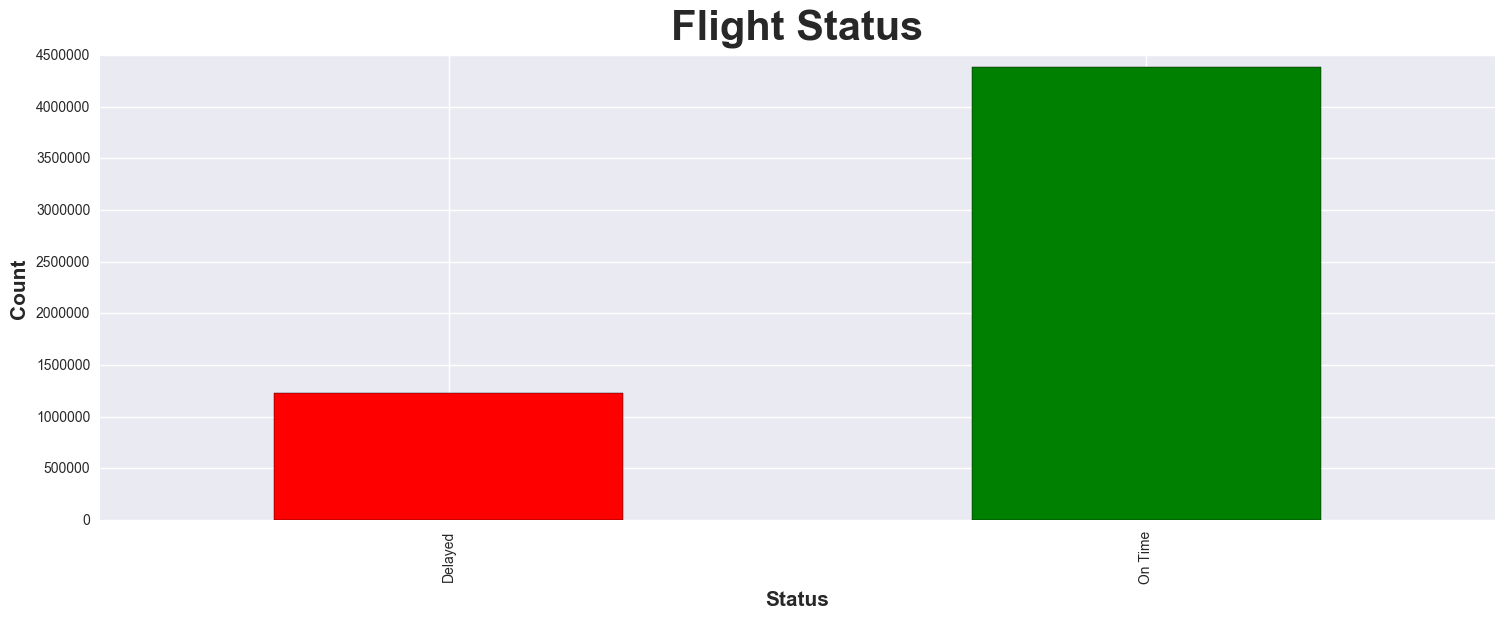

In [14]:
# Count of flights by status

plt.rc("figure", figsize=(18, 6))
c = df.groupby('Status')
c['Status'].count().plot(kind='bar', color =['red', 'green'])
plt.title('Flight Status',fontsize=30,fontweight="bold", va='bottom')
plt.ylabel('Count',fontsize=15,fontweight="bold")
plt.xlabel('Status',fontsize=15,fontweight="bold")
print(c['Status'].count())
plt.show()
#fig.savefig('/Users/sonalichaudhari/Desktop/ADS_Project/EDA/Graph/fig.png')

Status
Delayed    1231265
On Time    4386393
Name: Status, dtype: int64


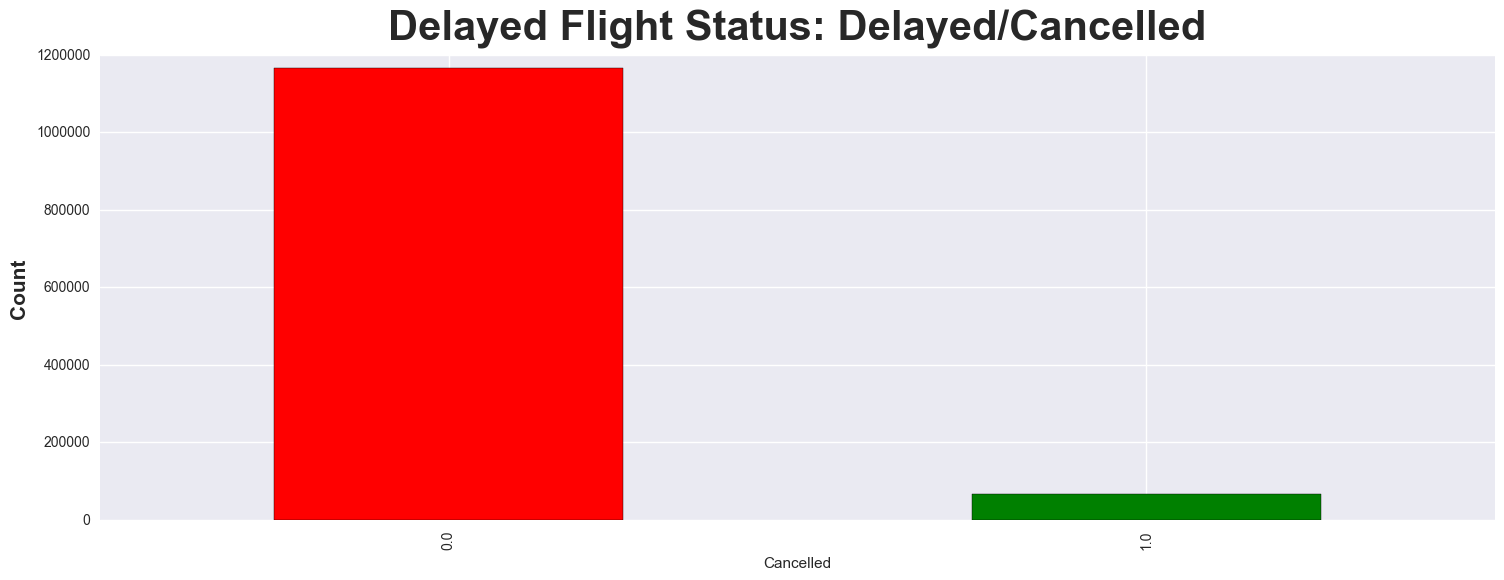

In [16]:
s = df[df['Status']=='Delayed'].groupby("Cancelled")
s['Cancelled'].count().plot(kind='bar', color =['red', 'green'])
plt.title('Delayed Flight Status: Delayed/Cancelled',fontsize=30,fontweight="bold", va='bottom')
plt.ylabel('Count',fontsize=15,fontweight="bold")
print(c['Status'].count())
plt.show()

## Mapping of LOOKup Tables

In [17]:
cancel = pd.read_csv(cur_path+'/Lookup/CancellationCode.csv', low_memory=False)
airport = pd.read_csv(cur_path+'/Lookup/AirportID.csv', low_memory=False)
carrier = pd.read_csv(cur_path+'/Lookup/UniqueCarrier.csv', low_memory=False)
origin = pd.read_csv(cur_path+'/Lookup/Origin.csv', low_memory=False)

In [18]:
cancel_dict = cancel.set_index('Code').T.to_dict('list')
origin_dict = origin.set_index('Code').T.to_dict('list')
airport_dict = airport.set_index('Code').T.to_dict('list')
carrier_dict = carrier.set_index('Code').T.to_dict('list')

In [19]:
# Delayed flight counts by Day of week

df.pivot_table(values=['index'], index='DayOfWeek', columns='Status', aggfunc=lambda x: len(x)).reset_index()

Status,DayOfWeek,Delayed,On Time
0,1,184381,644579
1,2,165749,648391
2,3,167701,656289
3,4,199348,633060
4,5,206372,643159
5,6,136325,551239
6,7,171389,609676


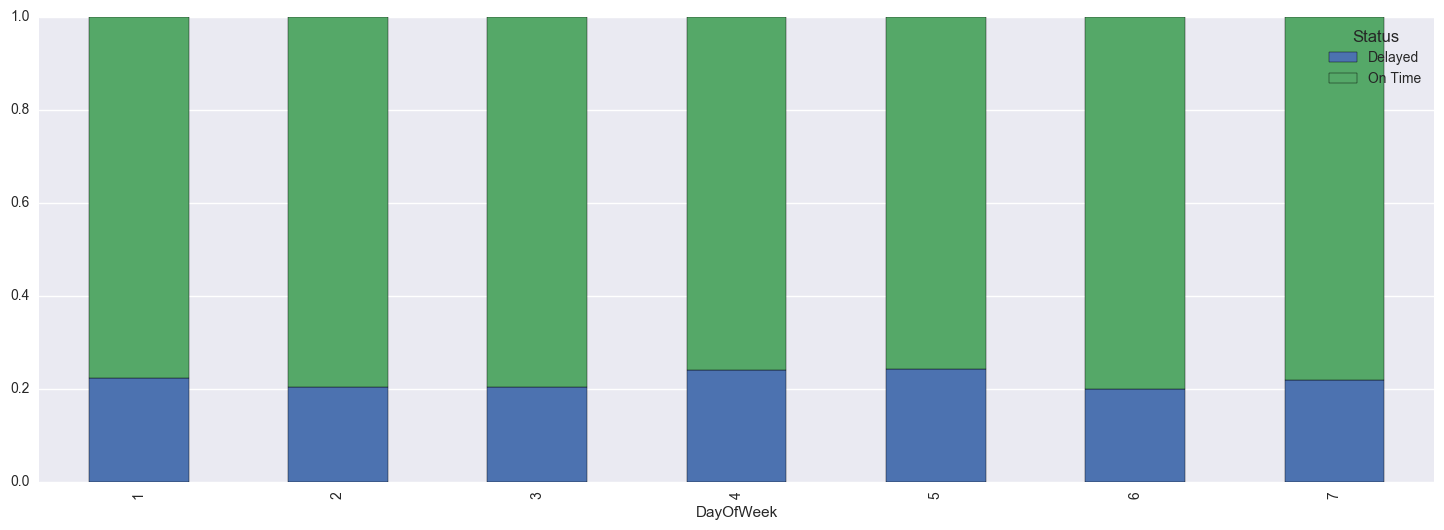

In [20]:
tps = df.pivot_table(values=['index'], index='DayOfWeek', columns='Status', aggfunc=lambda x: len(x))

tps = tps.div(tps.sum(1), axis=0)
tps.plot(kind='bar', stacked=True)
tps
plt.show()

### Delay by Airports

In [21]:
#Creating id column

df = df.reset_index()
df['index'] = df.index +1
#df=df.rename(columns = {'index':'id'})

In [22]:
df['Origin'].nunique()

313

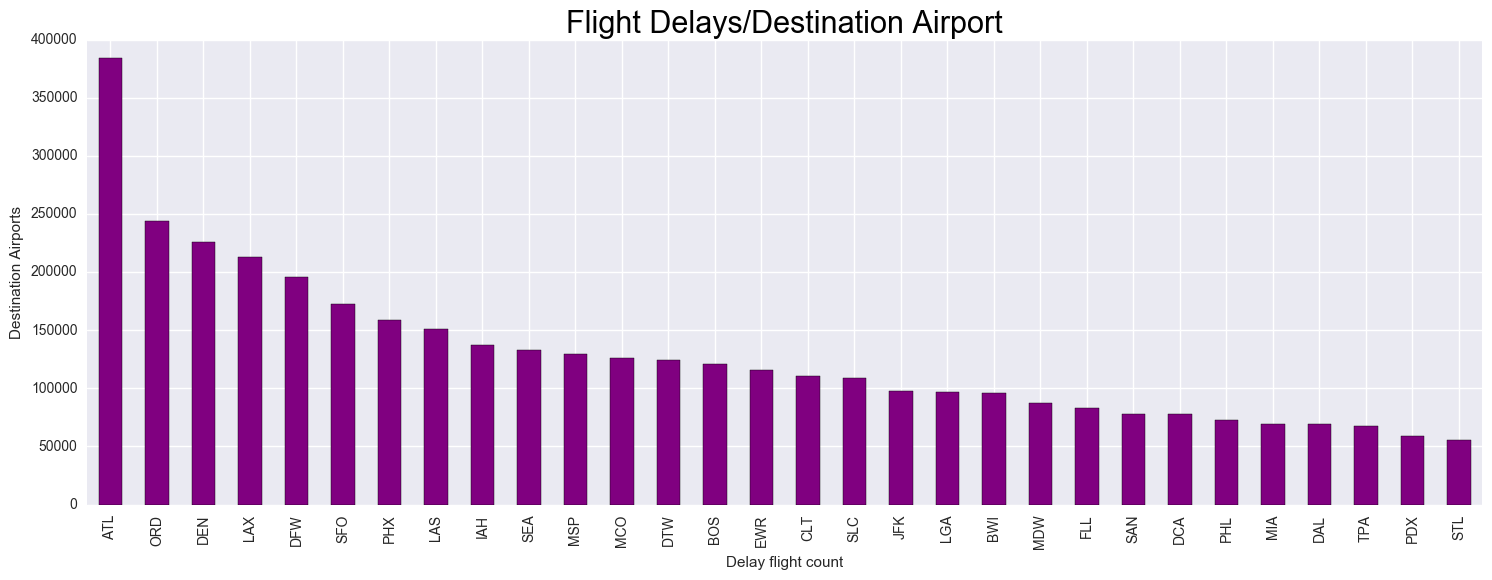

In [29]:
df.groupby('Dest')['index'].count().sort_values(ascending=0)[:30].plot(kind='bar',color='Purple')
plt.xlabel('Delay flight count')
plt.ylabel('Destination Airports')
plt.title('Flight Delays/Destination Airport',size=22,color="black")
plt.show()

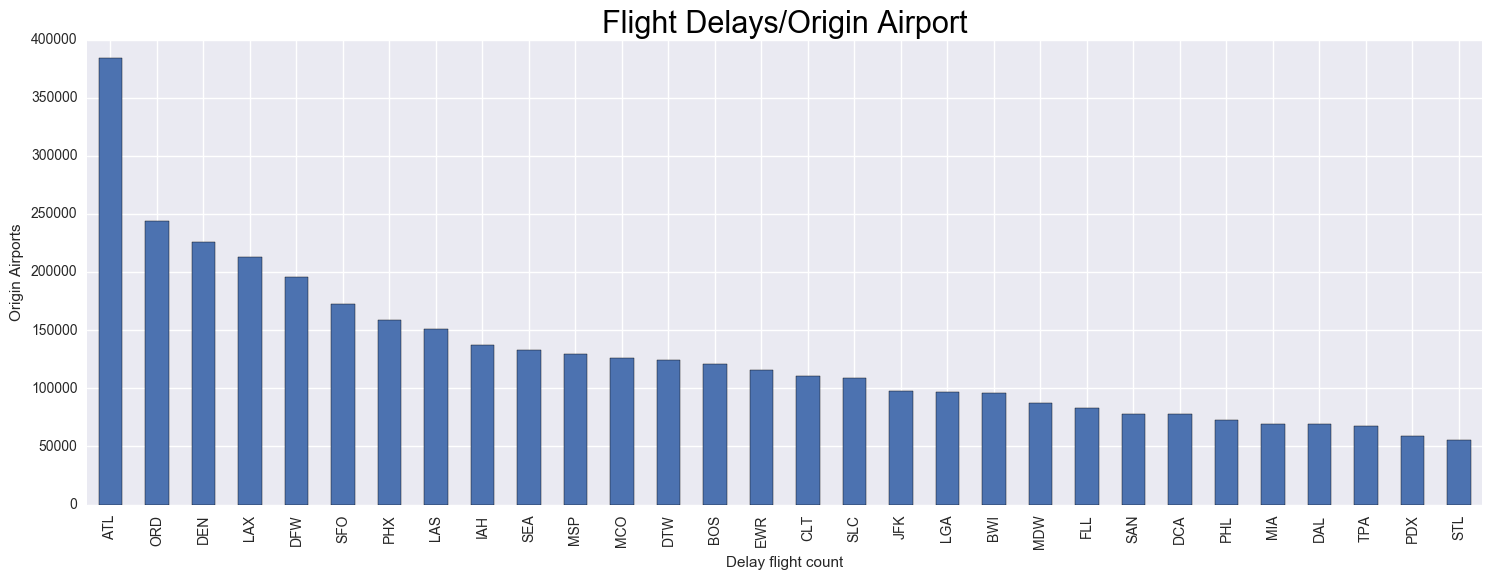

In [30]:
df.groupby('Origin')['index'].count().sort_values(ascending=0)[:30].plot(kind='bar')
plt.xlabel('Delay flight count')
plt.ylabel('Origin Airports')
plt.title('Flight Delays/Origin Airport',size=22,color="black")
plt.show()

In [75]:
df[['ArrDelay','DepDelay']].describe()

,ArrDelay,DepDelay
count,5.538145e+06,5.554202e+06
mean,3.519290e+00,8.938011e+00
std,4.187332e+01,3.976306e+01
min,-1.520000e+02,-2.040000e+02
25%,-1.400000e+01,-5.000000e+00
50%,-6.000000e+00,-2.000000e+00
75%,6.000000e+00,6.000000e+00
max,2.142000e+03,2.149000e+03


### Delay by Airline

In [31]:
df['Carrier'].unique()

array(['AA', 'AS', 'B6', 'DL', 'F9', 'HA', 'NK', 'EV', 'OO', 'UA', 'VX',
       'WN'], dtype=object)

In [32]:
df['Carrier'].nunique()

12

In [40]:
airport_dict[16386][0].split(',')[1].split(':')[1]

' Aua Island Airport'

In [33]:
df['Airline'] = df['UniqueCarrier'].apply(lambda x: carrier_dict[x][0])

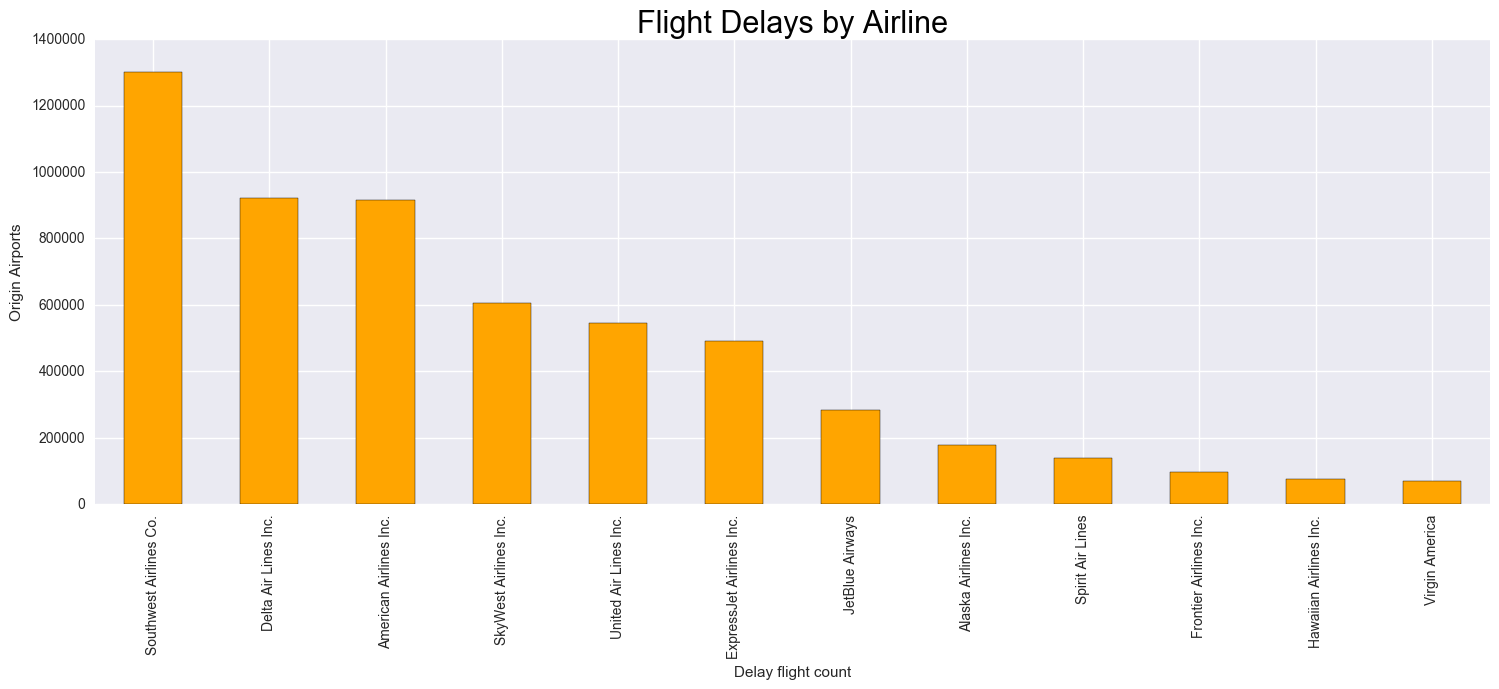

In [34]:
df.groupby('Airline')['index'].count().sort_values(ascending=0).plot(kind='bar',color="orange")
plt.xlabel('Delay flight count')
plt.ylabel('Origin Airports')
plt.title('Flight Delays by Airline',size=22,color="black")
plt.show()

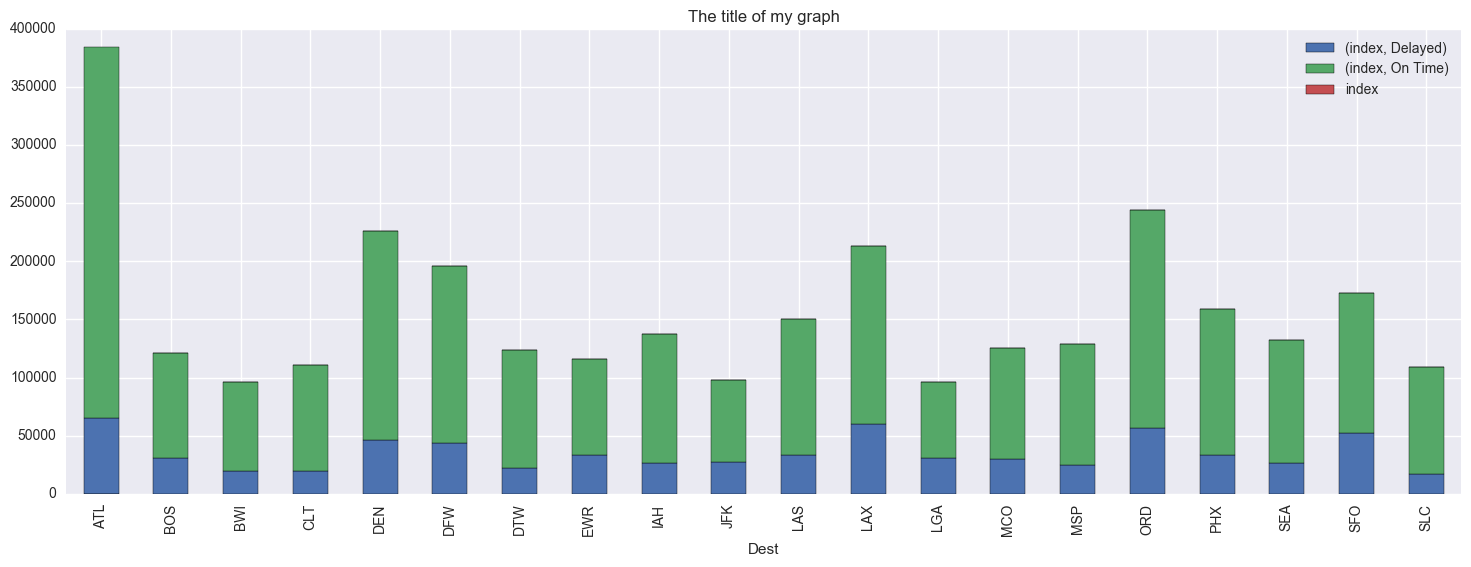

In [103]:
s = df.pivot_table(values=['index'], index='Dest', columns='Status', aggfunc=lambda x: len(x)).reset_index()
d2  = df.groupby('Dest')['index'].count().sort_values(ascending=0)[:20].to_frame().reset_index()['Dest']
d2 = d2.to_frame().reset_index()
s = pd.merge(s,d2, on ='Dest', how ='right')
s = s.set_index('Dest')
s.plot(kind='bar',stacked=True,title="The title of my graph",legend=True,)
plt.show()

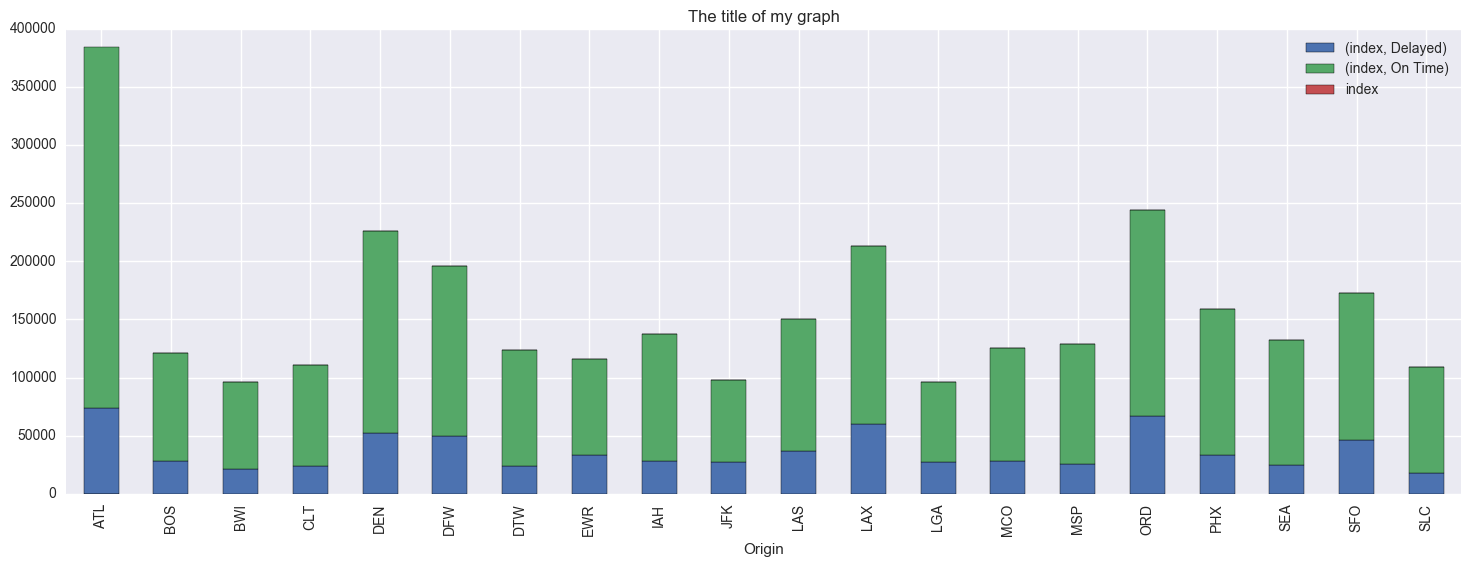

In [102]:
s = df.pivot_table(values=['index'], index='Origin', columns='Status', aggfunc=lambda x: len(x)).reset_index()
d2  = df.groupby('Origin')['index'].count().sort_values(ascending=0)[:20].to_frame().reset_index()['Origin']
d2 = d2.to_frame().reset_index()
s = pd.merge(s,d2, on ='Origin', how ='right')
s = s.set_index('Origin')
s.plot(kind='bar',stacked=True,title="The title of my graph",legend=True,)
plt.show()

Nan:  63456
Nan:  79513


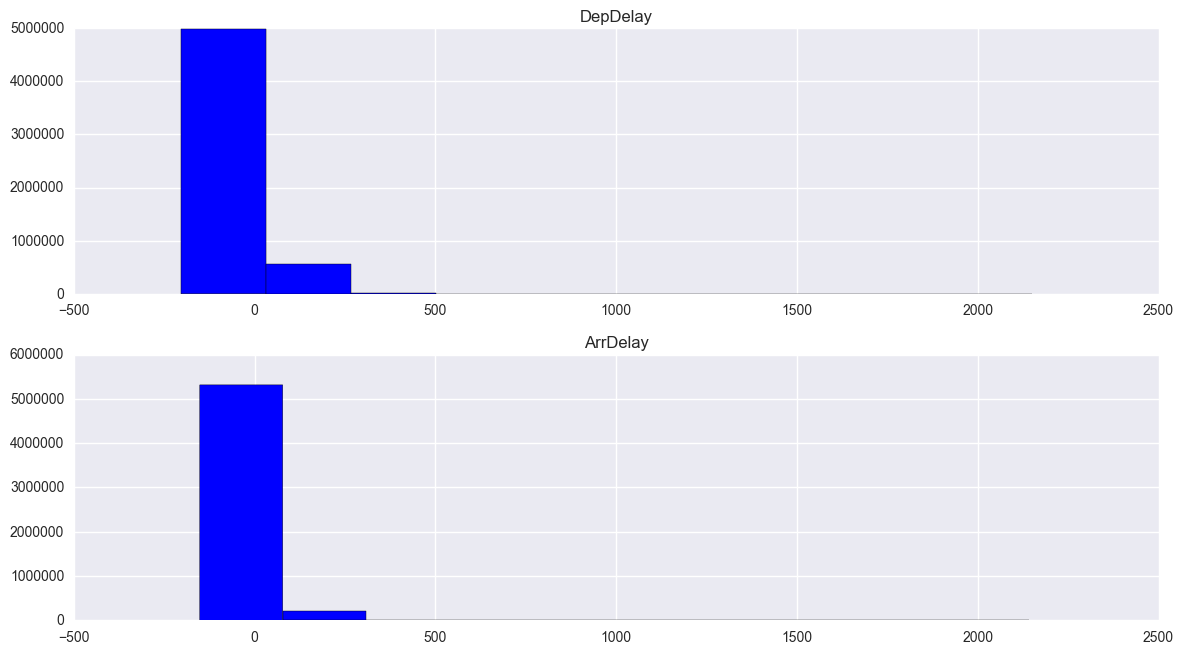

In [119]:
fig  = plt.figure(figsize=(12, 13), dpi=100);
sns.set(font_scale = 1)
axes1 = fig.add_subplot(411) 
axes2 = fig.add_subplot(412) 
print ('Nan: ',df['DepDelay'].isnull().sum())
ax1 = df.hist('DepDelay', color = 'Blue',ax=axes1);
print ('Nan: ',df['ArrDelay'].isnull().sum())
ax2 = df.hist('ArrDelay', color = 'Blue',ax=axes2);

fig.tight_layout()
plt.show()

Nan:  63456
Nan:  79513


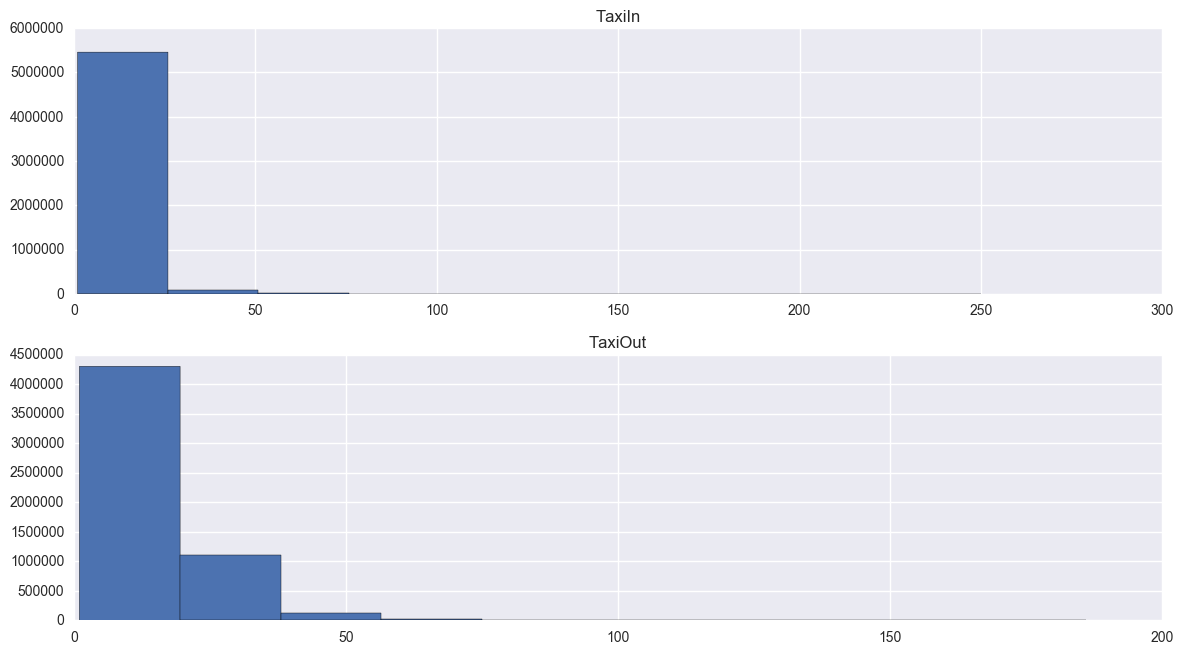

In [121]:
fig  = plt.figure(figsize=(12, 13), dpi=100);
sns.set(font_scale = 1)
axes1 = fig.add_subplot(411) 
axes2 = fig.add_subplot(412) 
print ('Nan: ',df['DepDelay'].isnull().sum())
ax1 = df.hist('TaxiIn',ax=axes1);
print ('Nan: ',df['ArrDelay'].isnull().sum())
ax2 = df.hist('TaxiOut',ax=axes2);

fig.tight_layout()
plt.show()

Nan:  65418
Nan:  67844


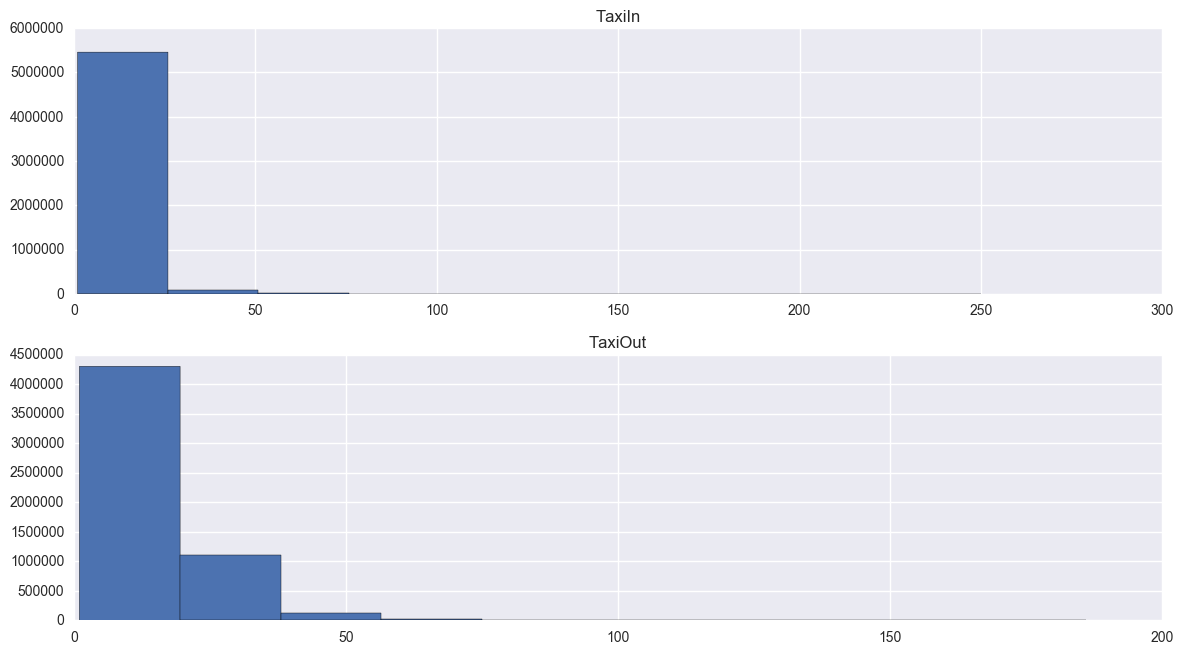

In [125]:
fig  = plt.figure(figsize=(12, 13), dpi=100);
sns.set(font_scale = 1)
axes1 = fig.add_subplot(411) 
axes2 = fig.add_subplot(412) 
print ('Nan: ',df['WheelsOff'].isnull().sum())
ax1 = df.hist('TaxiIn',ax=axes1);
print ('Nan: ',df['WheelsOn'].isnull().sum())
ax2 = df.hist('TaxiOut',ax=axes2);

fig.tight_layout()
plt.show()

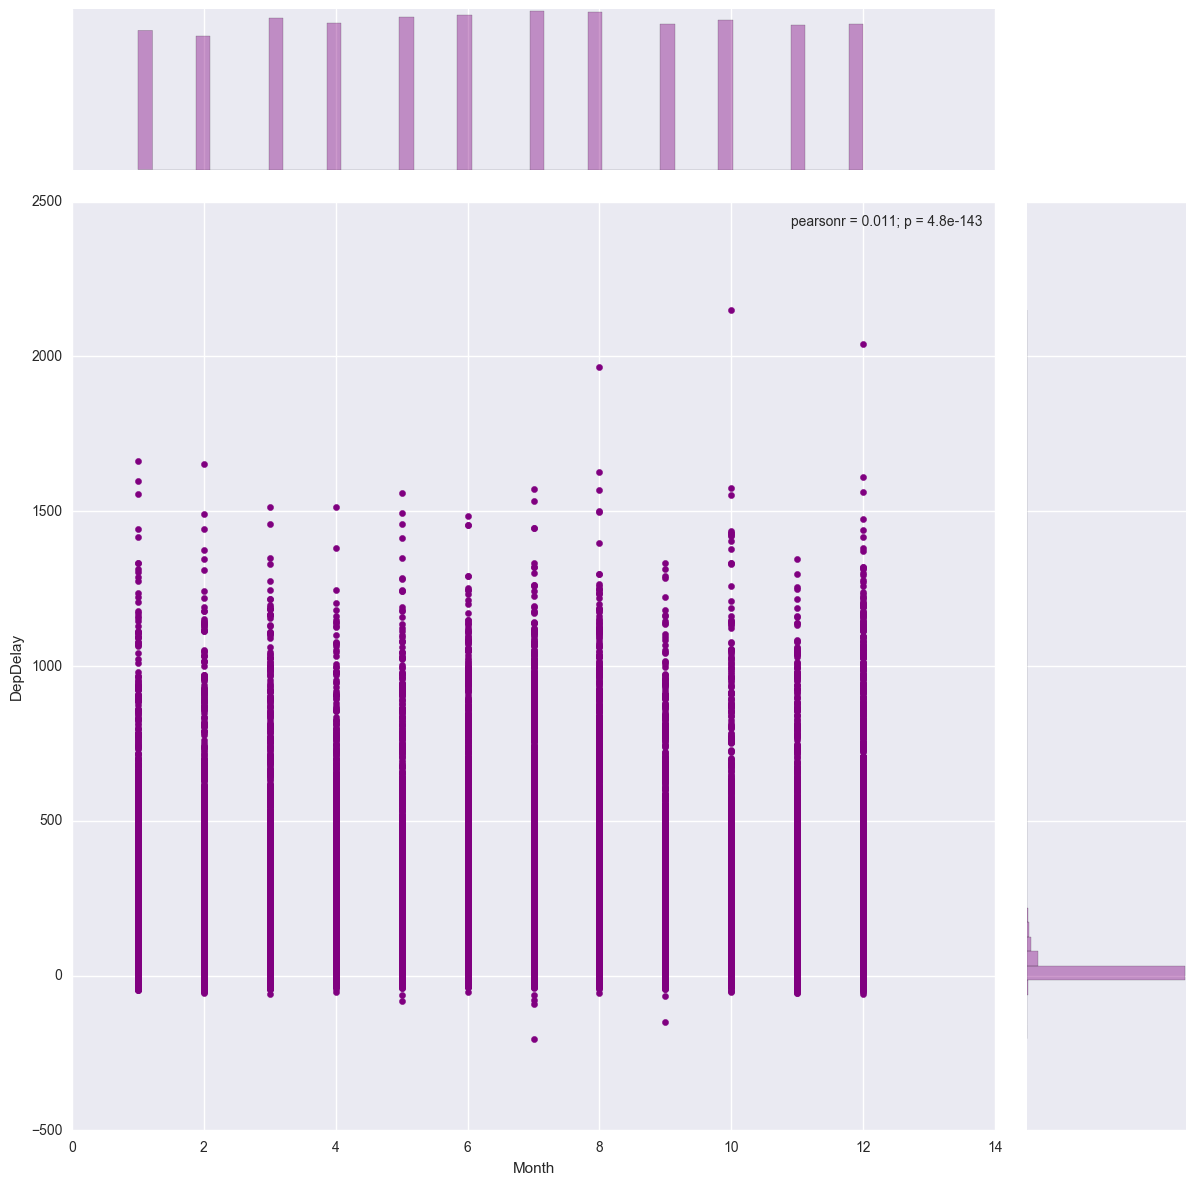

In [58]:
# Departure delay distribution over Months

plt.figure(figsize=(12,12), dpi=100)
sns.set(font_scale = 1)
sns.jointplot(x='Month', y='DepDelay', data=df, size=12, color='purple');
plt.show()

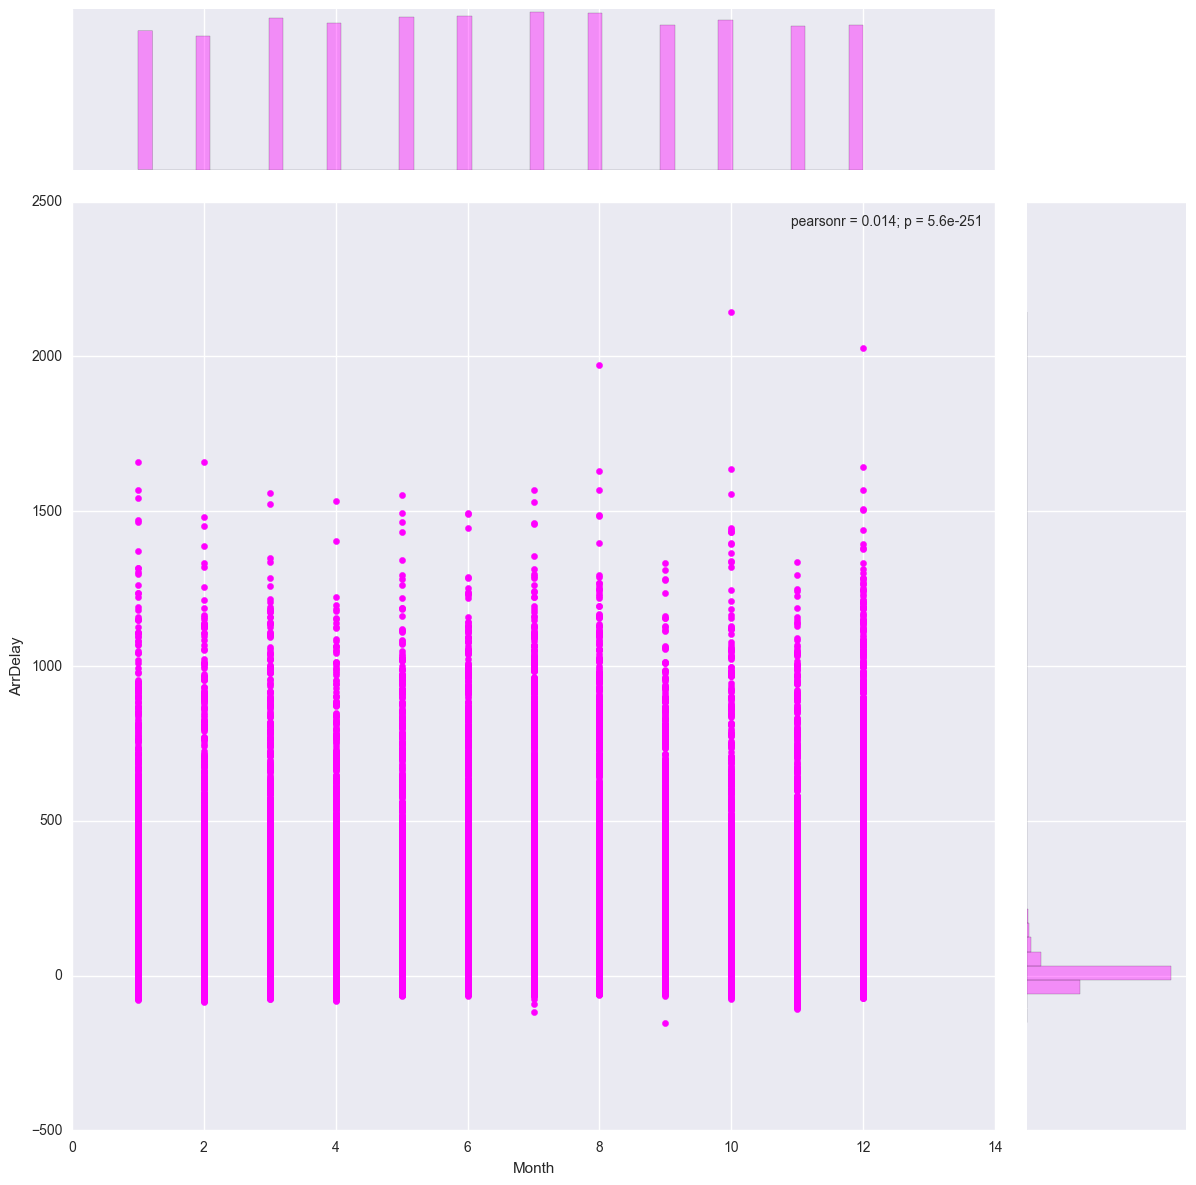

In [95]:
# Arrival delay distribution over Months
plt.figure(figsize=(12,12), dpi=100)
sns.set(font_scale = 1)
sns.jointplot(x='Month', y='ArrDelay', data=df, size=12, color='magenta');
plt.show()

In [126]:
# f, ax = plt.subplots(figsize=(10, 5))
# ax.set_title('Average Daily Flight Delay, Minutes')
# ax.plot(df['Month'],df['DepDelay'])
# plt.show()

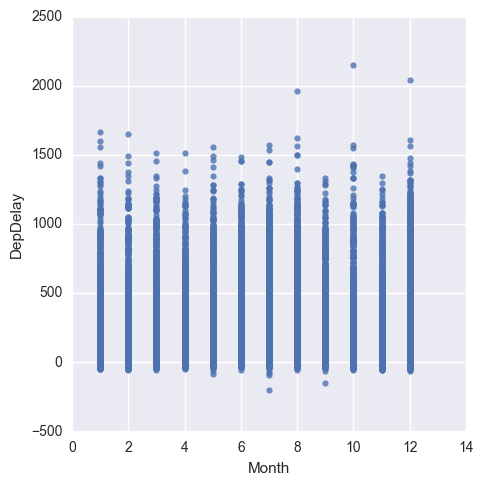

In [127]:
sns.lmplot(x='Month', y='DepDelay', data=df, fit_reg=False)
plt.show()

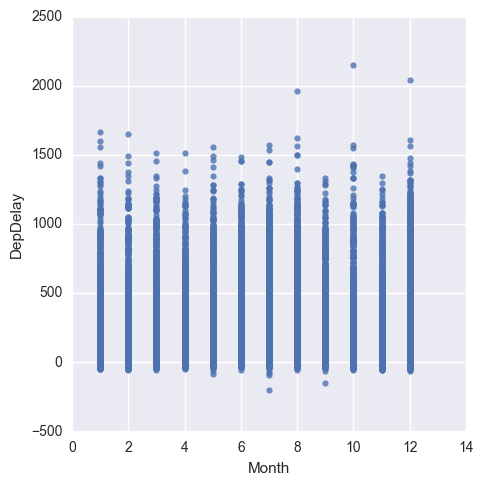

In [39]:
sns.lmplot(x='Month', y='ArrDelay', data=df, fit_reg=False)
plt.show()

In [27]:
#sns.lmplot(x='Origin', y='DepDelay', data=df, fit_reg=False)

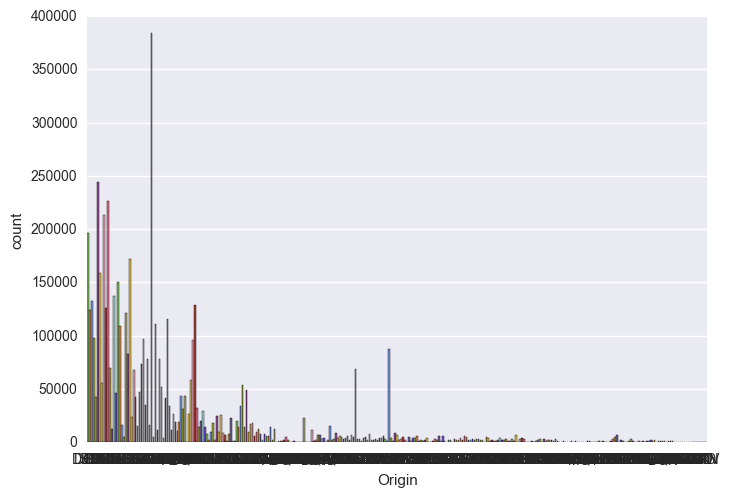

In [16]:
sns.countplot(x='Origin', data=df, palette=pkmn_type_colors)
plt.show()

In [13]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

In [43]:
df['Origin'].nunique()

313

In [28]:
# import seaborn
# corr_df = df[p[:10]].set_index(df.columns.values.tolist()[0], drop=True)
# plot_corr(corr_df)

In [19]:
def plot_corr(corr_df):
    """
    to plot heatmap given correlation dataframe
    input:
        dataframe
    output:
        None
        
    """
    # Create a mask to display only the lower triangle of the matrix (since it's mirrored around its 
    # top-left to bottom-right diagonal).
    mask = np.zeros_like(corr_df)
    mask[np.triu_indices_from(mask)] = True
    # Create the heatmap using seaborn library. 
    # List if colormaps (parameter 'cmap') is available here: http://matplotlib.org/examples/color/colormaps_reference.html
    seaborn.heatmap(corr_df, cmap='RdYlGn_r', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5, annot= True)

    # Show the plot we reorient the labels for each column and row to make them easier to read.
    plt.yticks(rotation=0) 
    plt.xticks(rotation=90) 
    plt.show()

In [113]:
# Loading the lookup csvs and converting them into list

airport = pd.read_csv(cur_path+'/Lookup/AirportID.csv', low_memory=False)
carrier = pd.read_csv(cur_path+'/Lookup/UniqueCarrier.csv', low_memory=False)
origin = pd.read_csv(cur_path+'/Lookup/Origin.csv', low_memory=False)
airline = pd.read_csv(cur_path+'/Lookup/Airline.csv', low_memory=False)

In [119]:
origin_dict = origin.set_index('Code').T.to_dict('list')
airport_dict = airport.set_index('Code').T.to_dict('list')
carrier_dict = carrier.set_index('Code').T.to_dict('list')
airline_dict = airline.set_index('Code').T.to_dict('list')

In [122]:
df['Airline'] = df['AirlineID'].apply(lambda x: airline_dict[x][0])

In [42]:
# fig = plt.figure(1, figsize=(16,15))
# import matplotlib.patches as mpatches  
# colors = ['firebrick', 'gold', 'lightcoral', 'aquamarine', 'c', 'yellowgreen', 'grey',
#           'seagreen', 'tomato', 'violet', 'wheat', 'chartreuse', 'lightskyblue', 'royalblue']

# ax1 = sns.stripplot(y="Airline", x="DepDelay", size = 4, palette = colors,data=df, linewidth = 0.5,  jitter=True)
# plt.setp(ax1.get_xticklabels(), fontsize=14)
# plt.setp(ax1.get_yticklabels(), fontsize=14)
# ax1.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])for x in ax1.get_xticks()])
# plt.xlabel('Departure delay', fontsize=18, bbox={'facecolor':'midnightblue', 'pad':5},color='w', labelpad=20)
# ax1.yaxis.label.set_visible(False)

# plt.show()

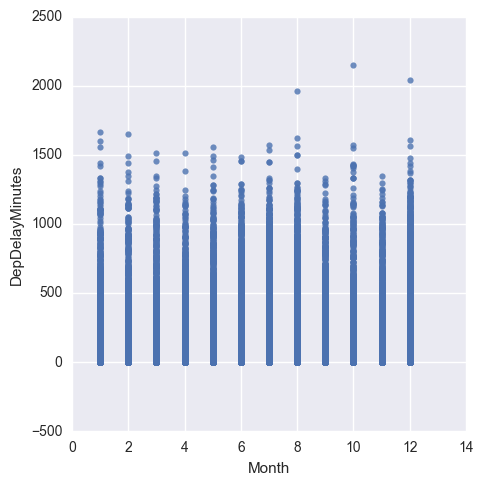

In [40]:
# Delay Minutes Distribution

sns.lmplot(x='Month', y='DepDelayMinutes', data=df, fit_reg=False)
plt.show()

In [45]:
df['DepDelayMinutes'].describe()

count    5.554202e+06
mean     1.187460e+01
std      3.872657e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      6.000000e+00
max      2.149000e+03
Name: DepDelayMinutes, dtype: float64

In [44]:
df['ArrDelayMinutes'].describe()

count    5.538145e+06
mean     1.184726e+01
std      3.836441e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      6.000000e+00
max      2.142000e+03
Name: ArrDelayMinutes, dtype: float64

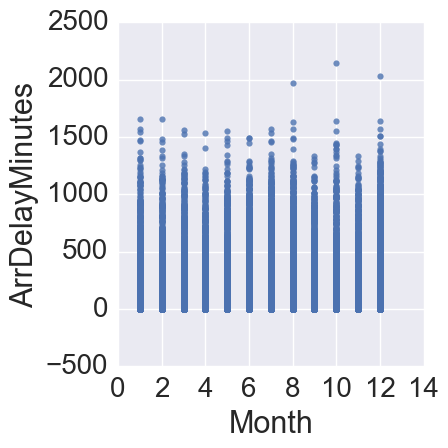

In [82]:
# Arrival Minutes Distribution
plt.figure(figsize=(20,10))
sns.lmplot(x='Month', y='ArrDelayMinutes', data=df, fit_reg=False)
plt.show()

In [73]:
# df1 = df[~df.groupby('ArrDelayMinutes').transform( lambda x: abs(x-x.mean()) > 1.96*x.std()).values]
# print (df1)

In [15]:
df1 = df[df.Month==1]

In [16]:
df1.shape

(445827, 64)

In [ ]:
df['DayOfWeek']

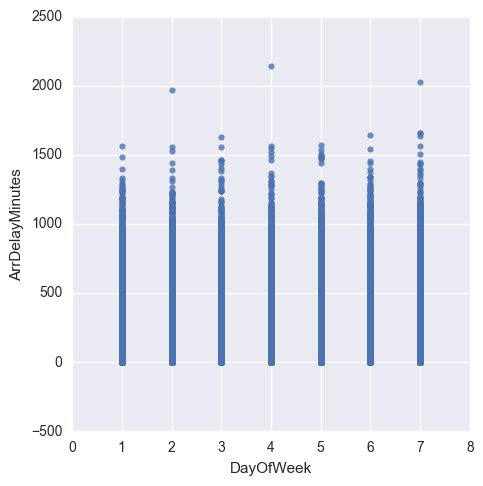

In [132]:
sns.lmplot(x='DayOfWeek', y='ArrDelayMinutes', data=df, fit_reg=False)
plt.show()

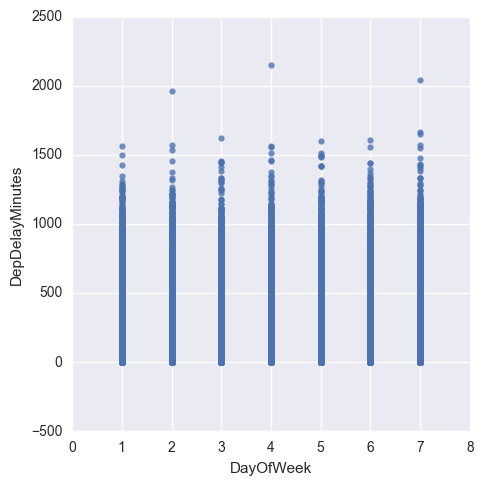

In [133]:
sns.lmplot(x='DayOfWeek', y='DepDelayMinutes', data=df, fit_reg=False)
plt.show()

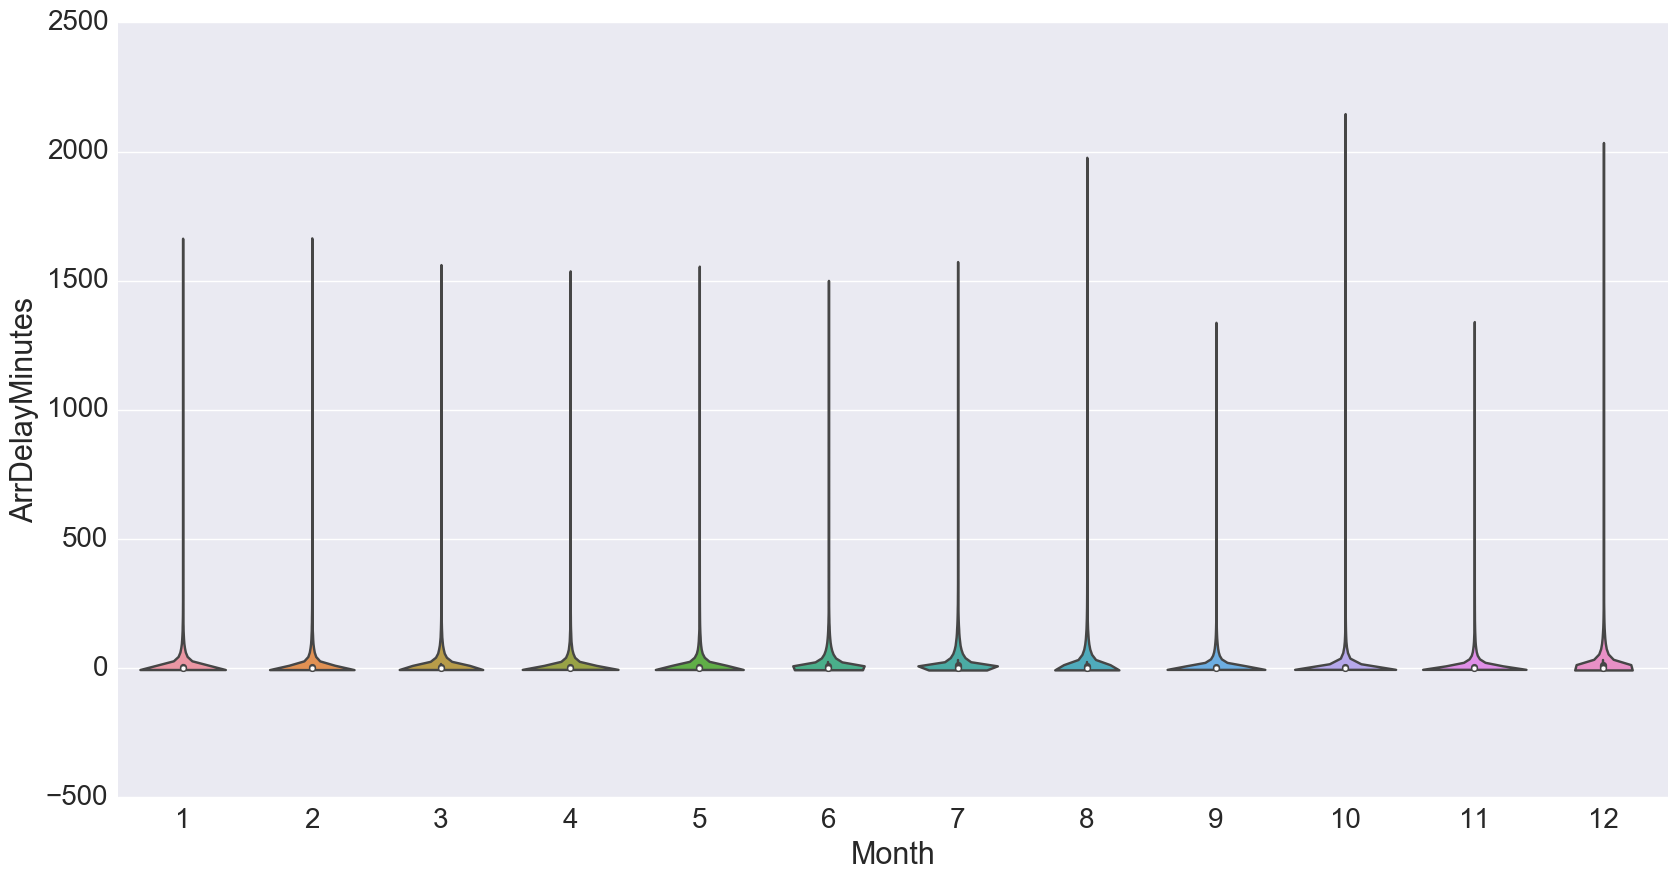

In [44]:
plt.figure(figsize=(20,10))
sns.set(font_scale = 2)
sns.violinplot(x='Month', y='ArrDelayMinutes', data=df)
plt.show()

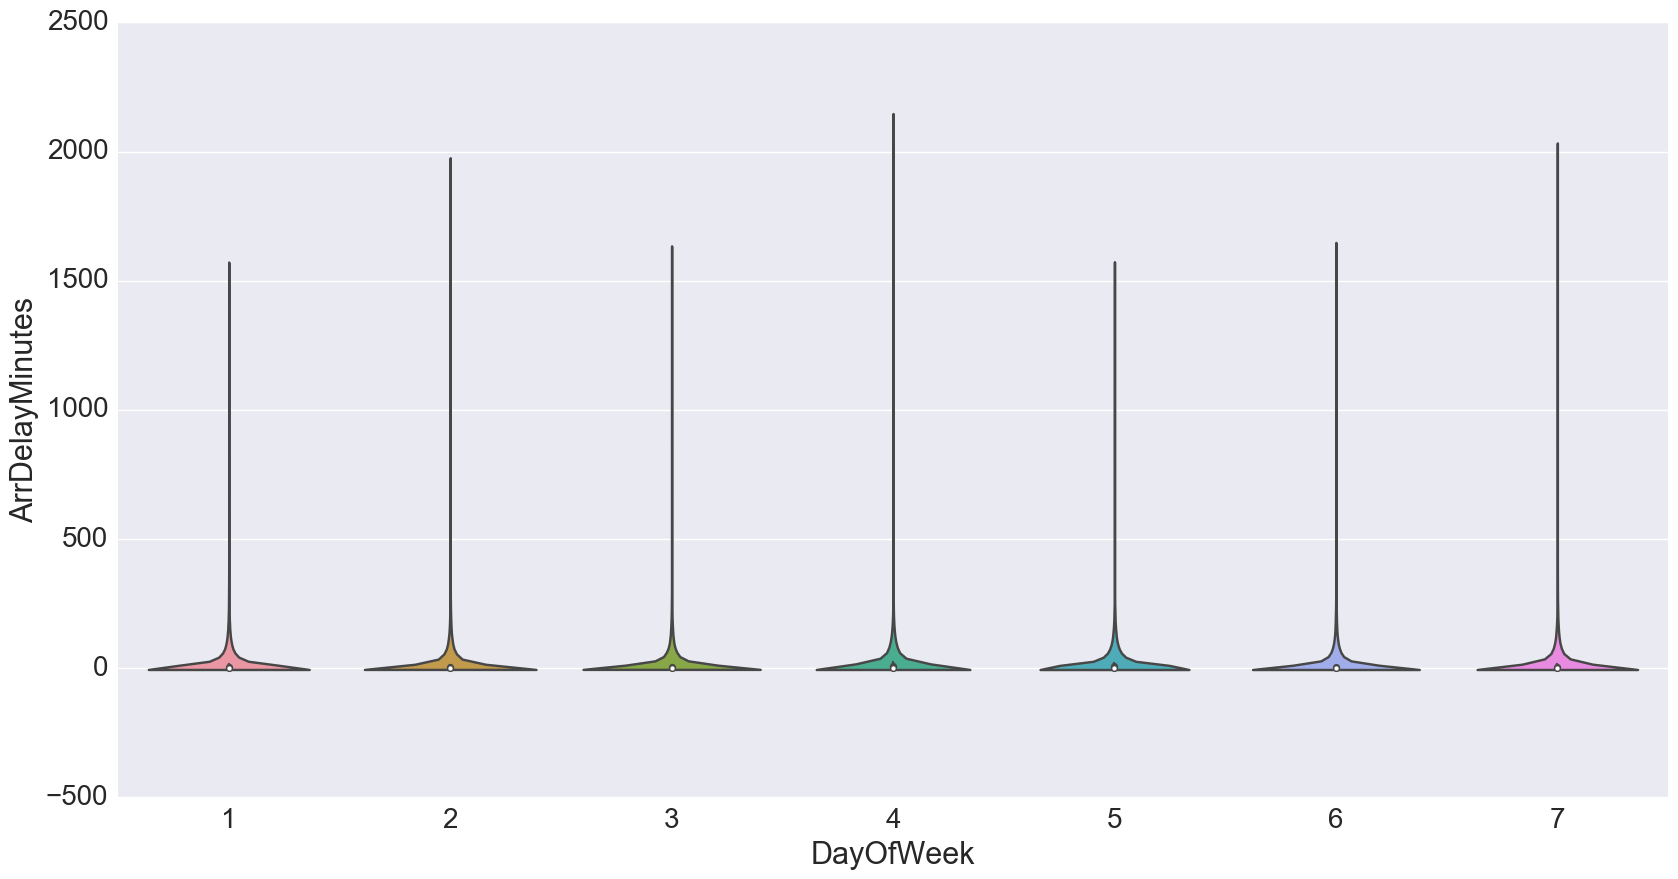

In [47]:
plt.figure(figsize=(20,10))
sns.set(font_scale = 2)
sns.violinplot(x='DayOfWeek', y='ArrDelayMinutes', data=df)
plt.show()

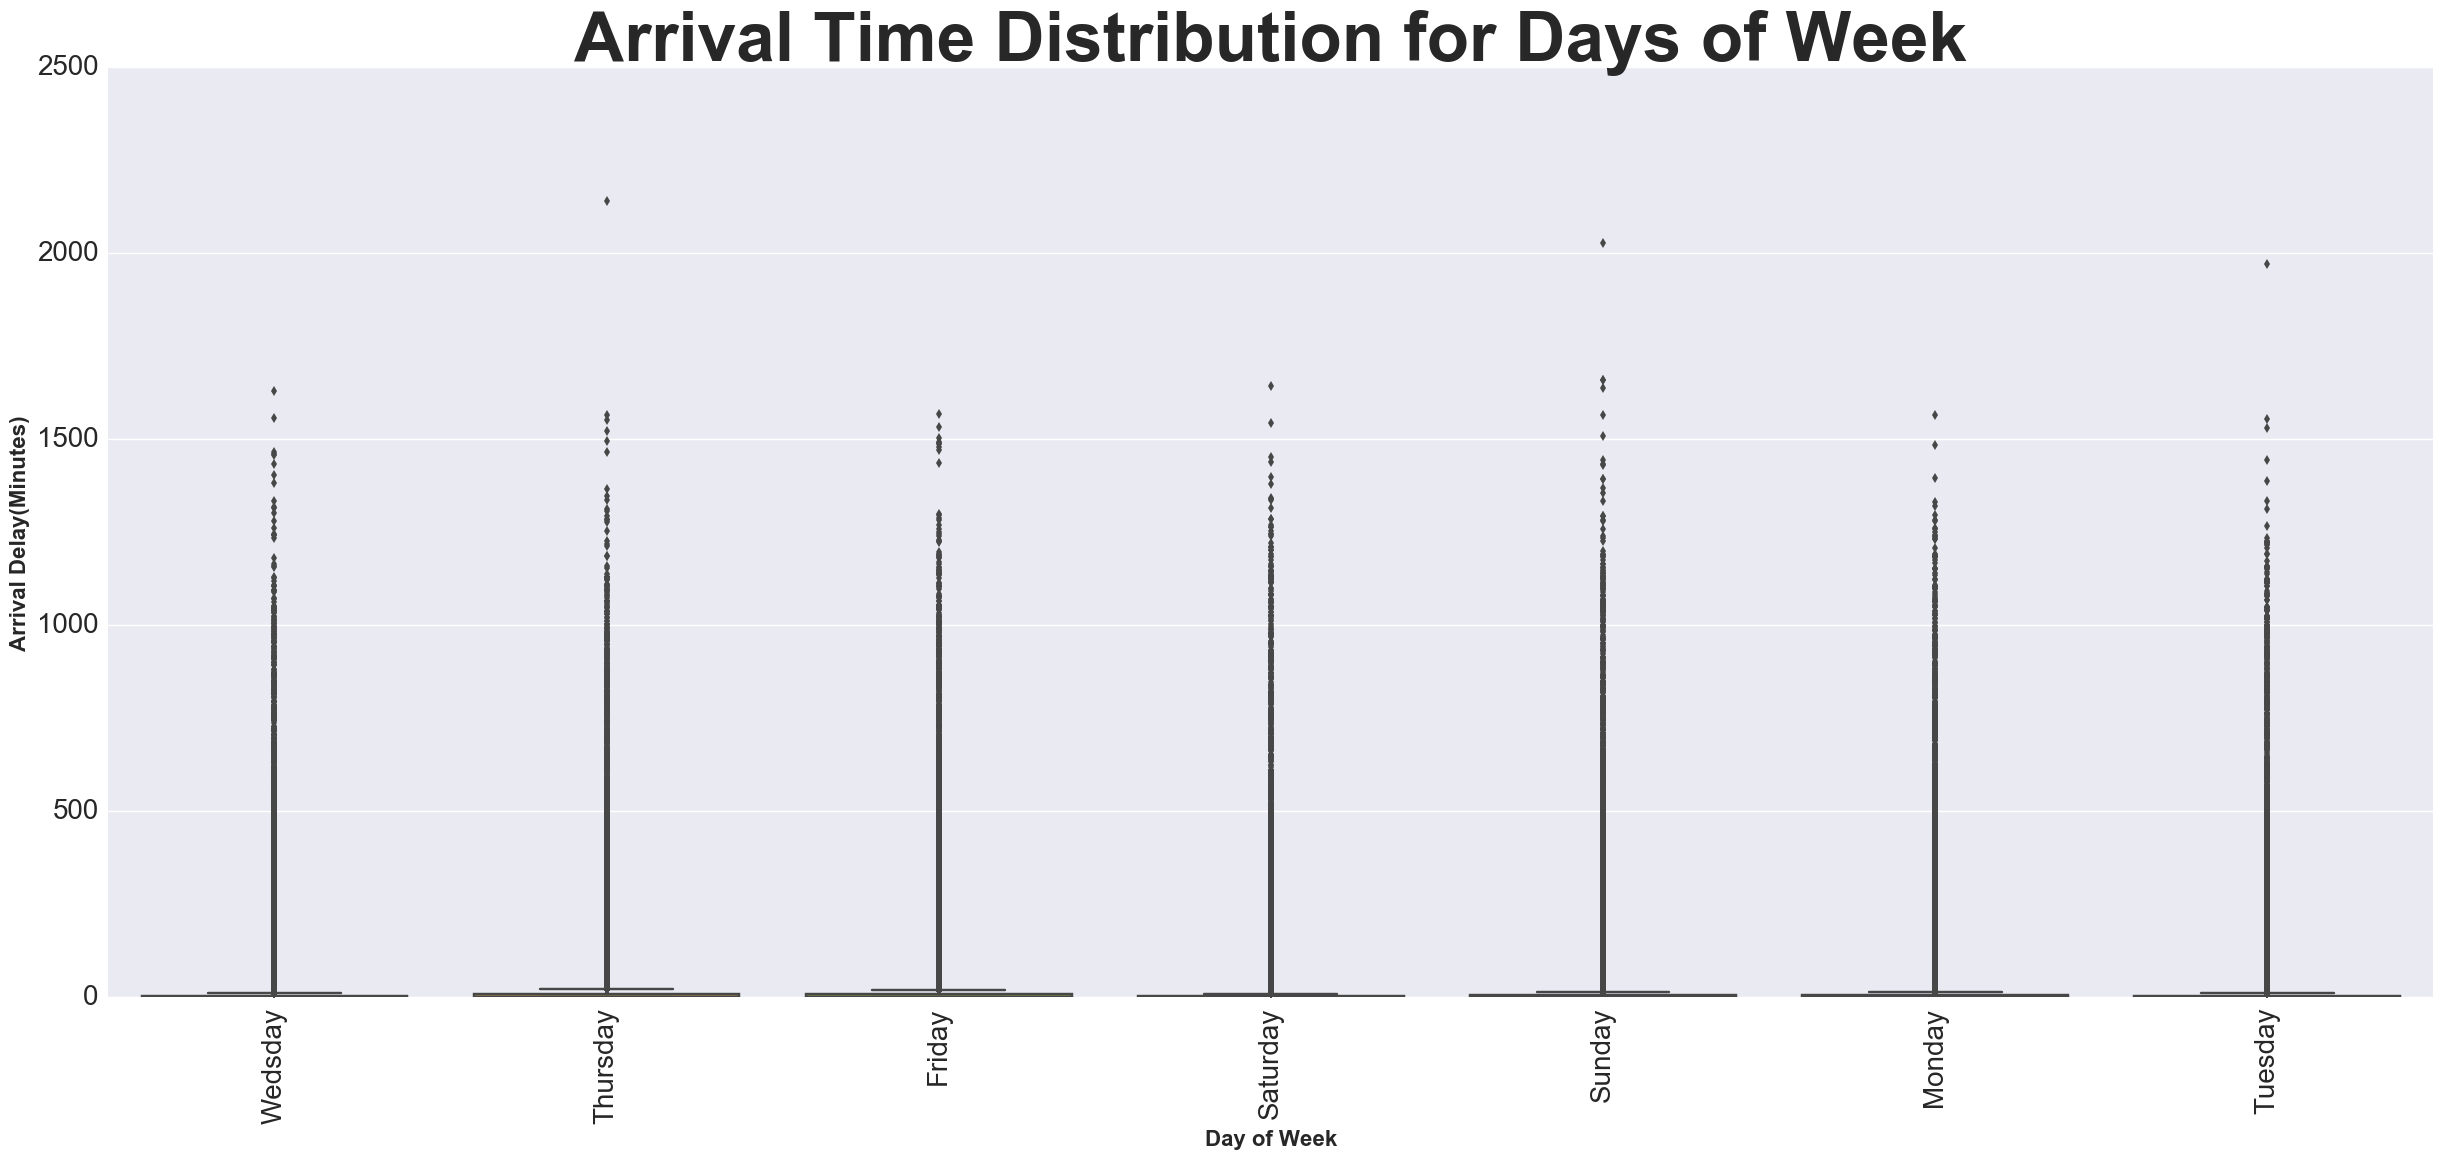

In [52]:
plt.figure(figsize=(30,12))
sns.boxplot(x="day", y="ArrDelayMinutes", data=df);
plt.ylabel('Arrival Delay(Minutes)', fontsize=16,fontweight="bold")
plt.xlabel('Day of Week', fontsize=16, fontweight="bold")
plt.xticks(rotation='vertical')
plt.title("Arrival Time Distribution for Days of Week", fontsize=50, fontweight="bold")
plt.show()

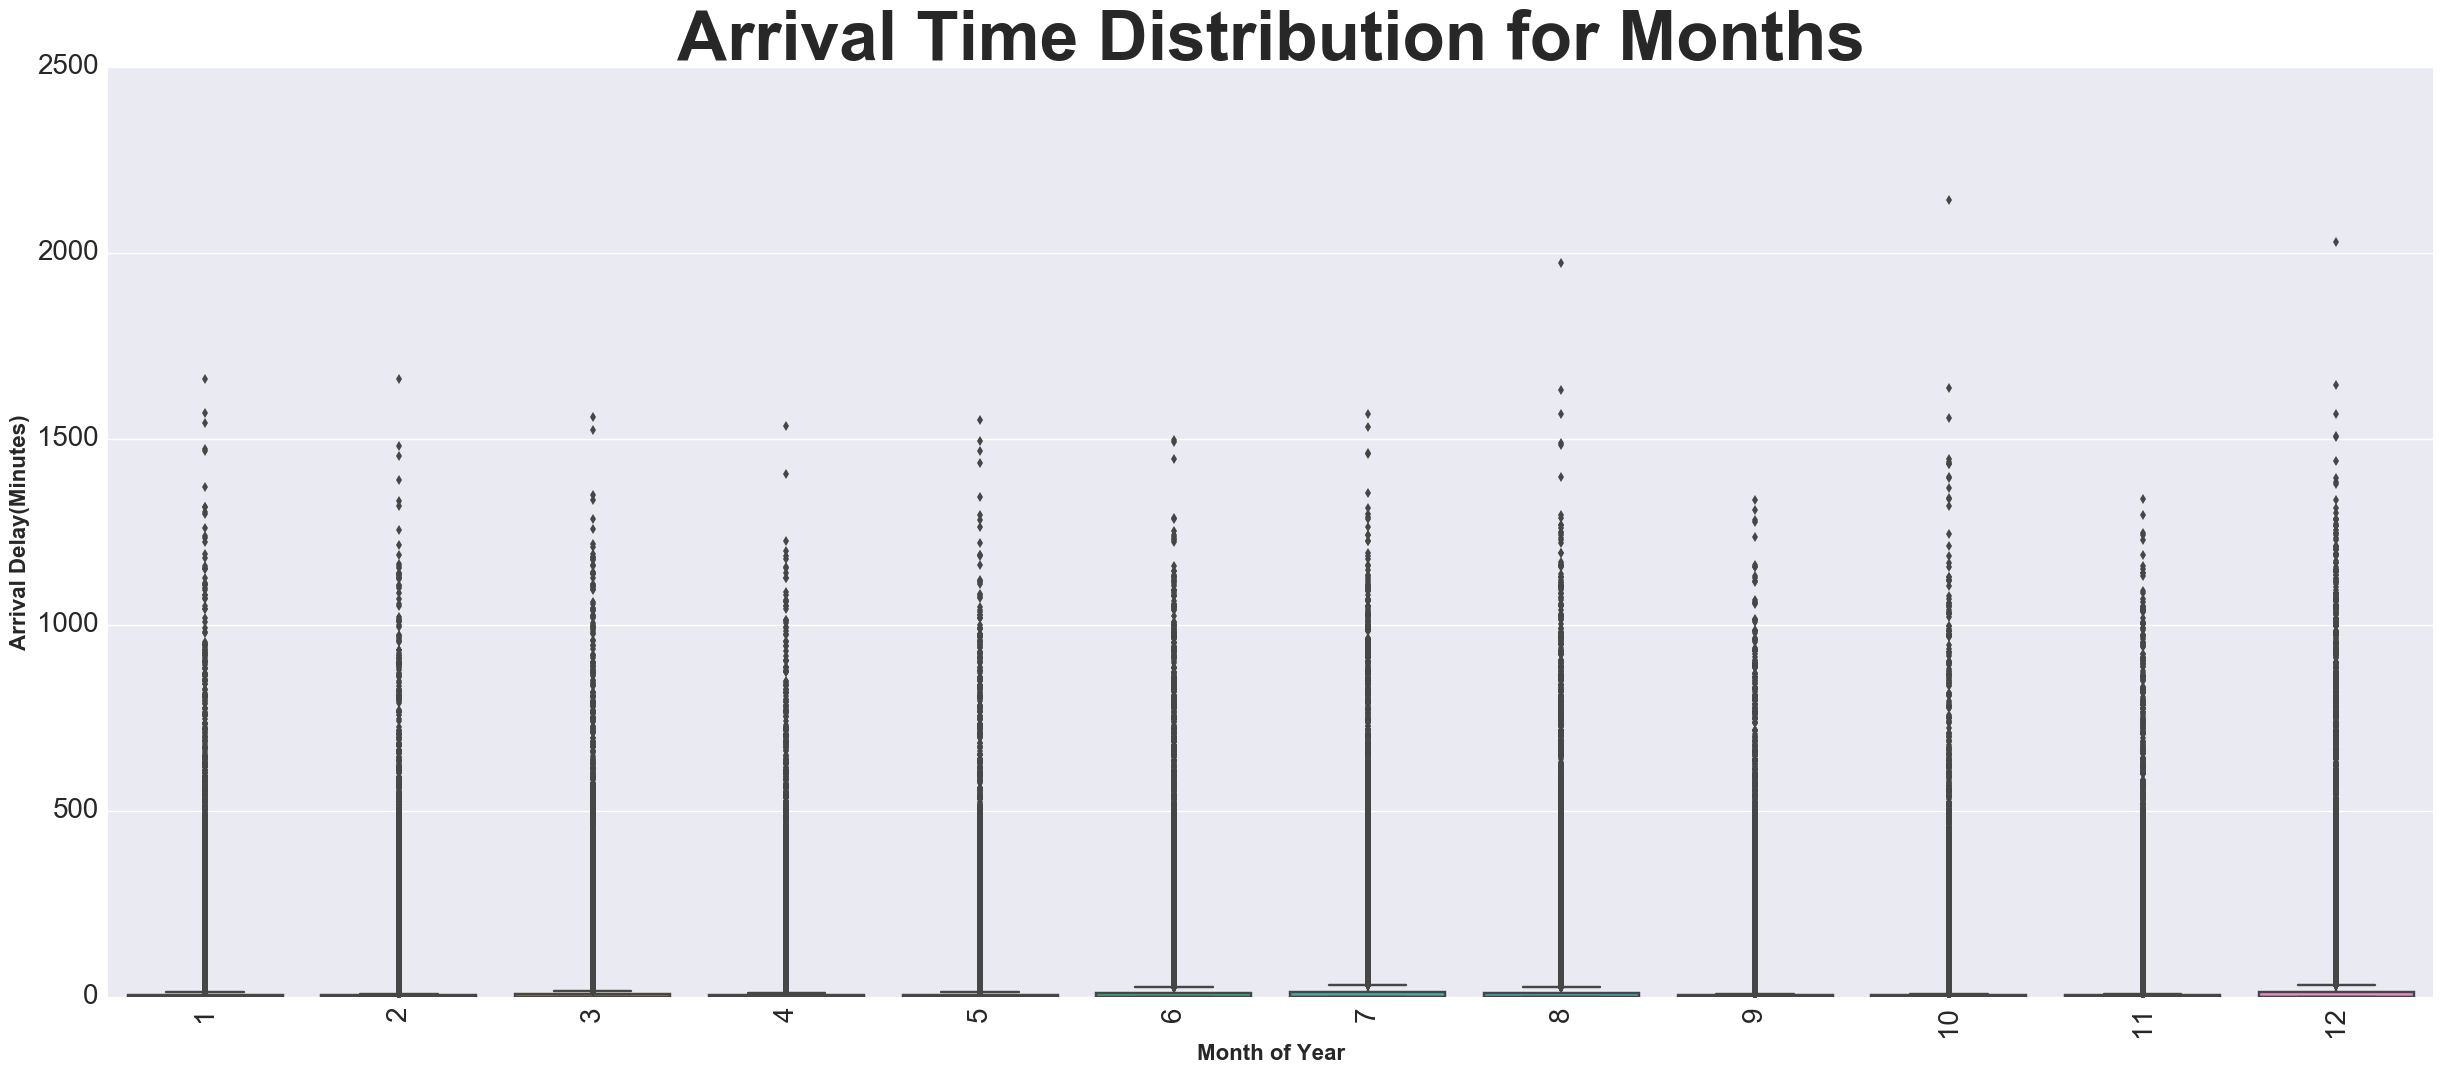

In [53]:
plt.figure(figsize=(30,12))
sns.boxplot(x="Month", y="ArrDelayMinutes", data=df);
plt.ylabel('Arrival Delay(Minutes)', fontsize=16,fontweight="bold")
plt.xlabel('Month of Year', fontsize=16, fontweight="bold")
plt.xticks(rotation='vertical')
plt.title("Arrival Time Distribution for Months", fontsize=50, fontweight="bold")
plt.show()

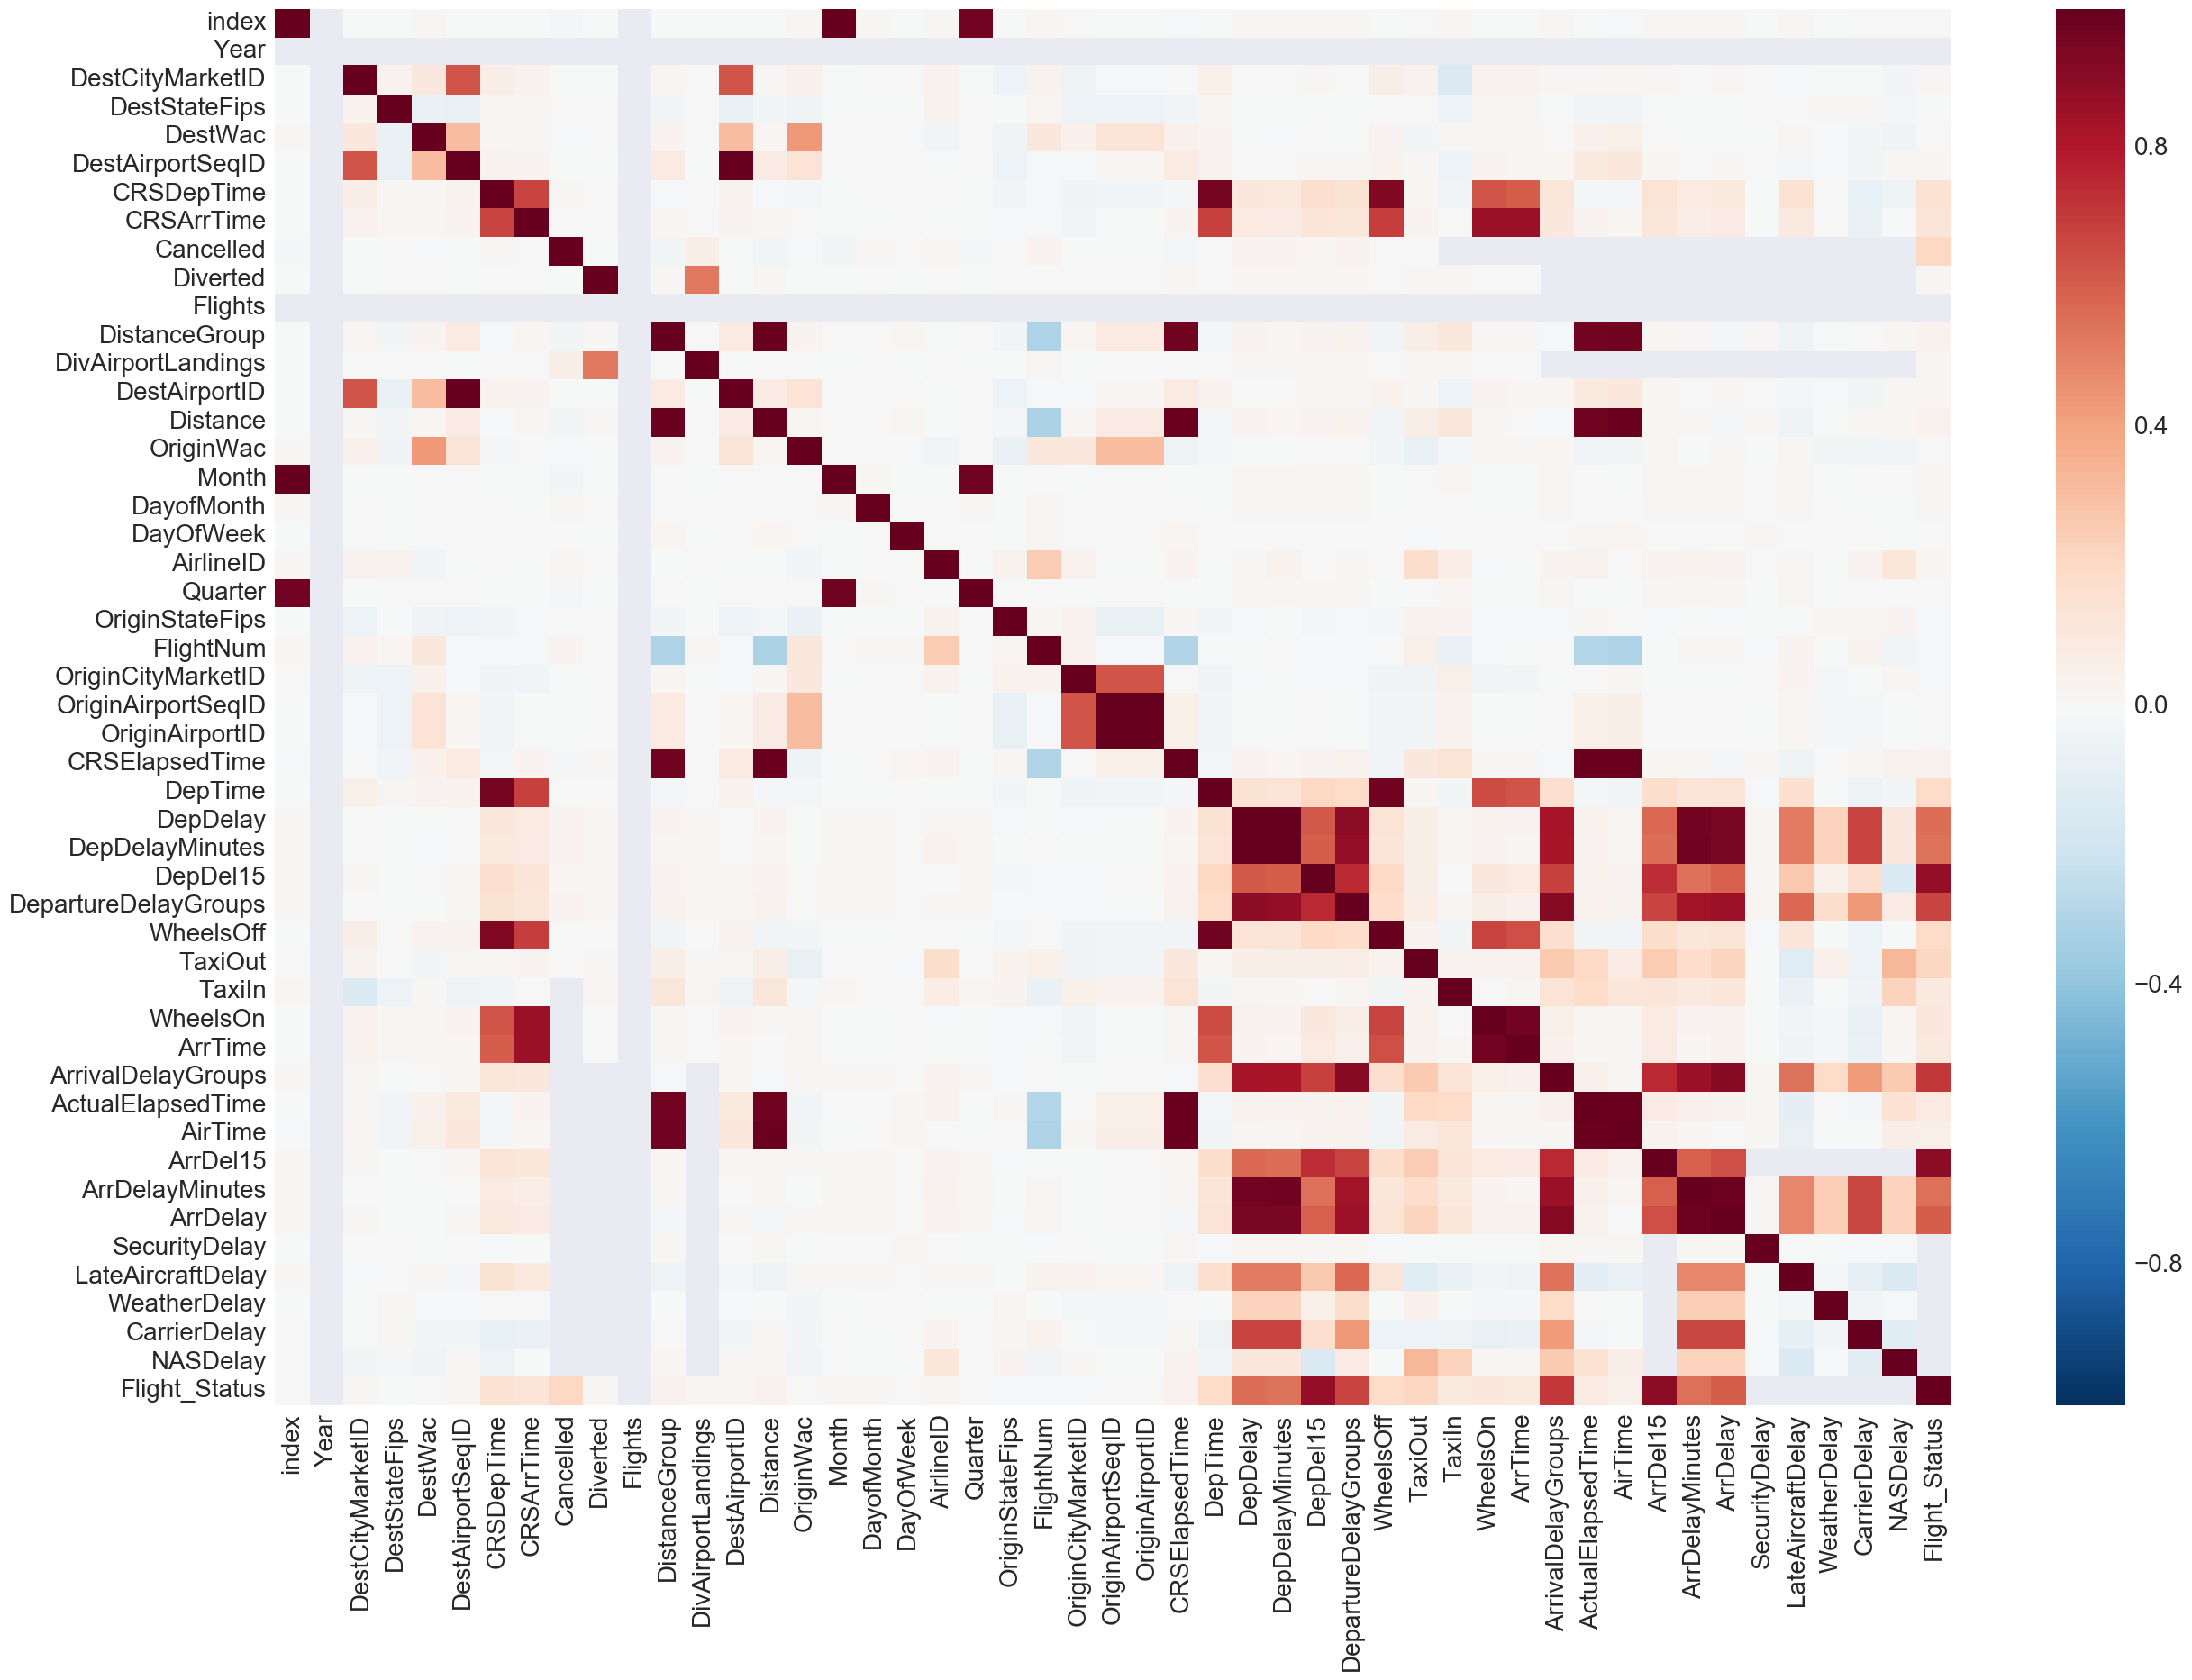

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
color = sns.color_palette()
plt.figure(figsize = (30,20))
sns.set(font_scale = 2)
sns.heatmap(data=df.corr())
plt.show()
plt.gcf().clear()

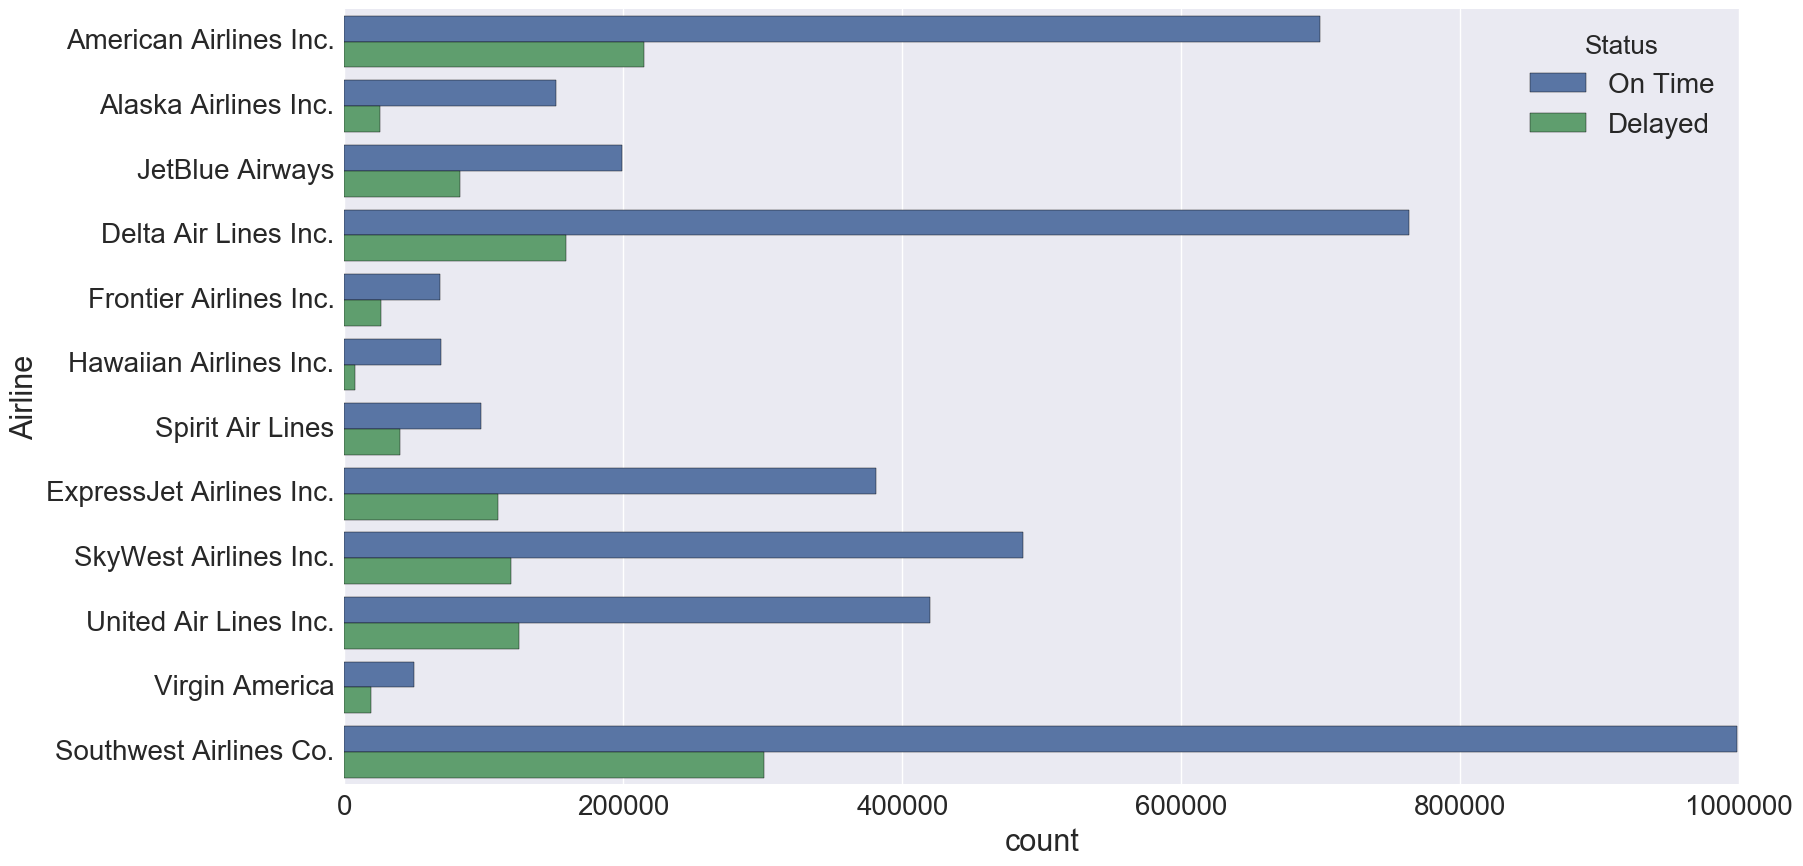

In [157]:
plt.figure(figsize=(18, 10))
ax = sns.countplot(y="Airline", hue='Status', data=df)
plt.show()

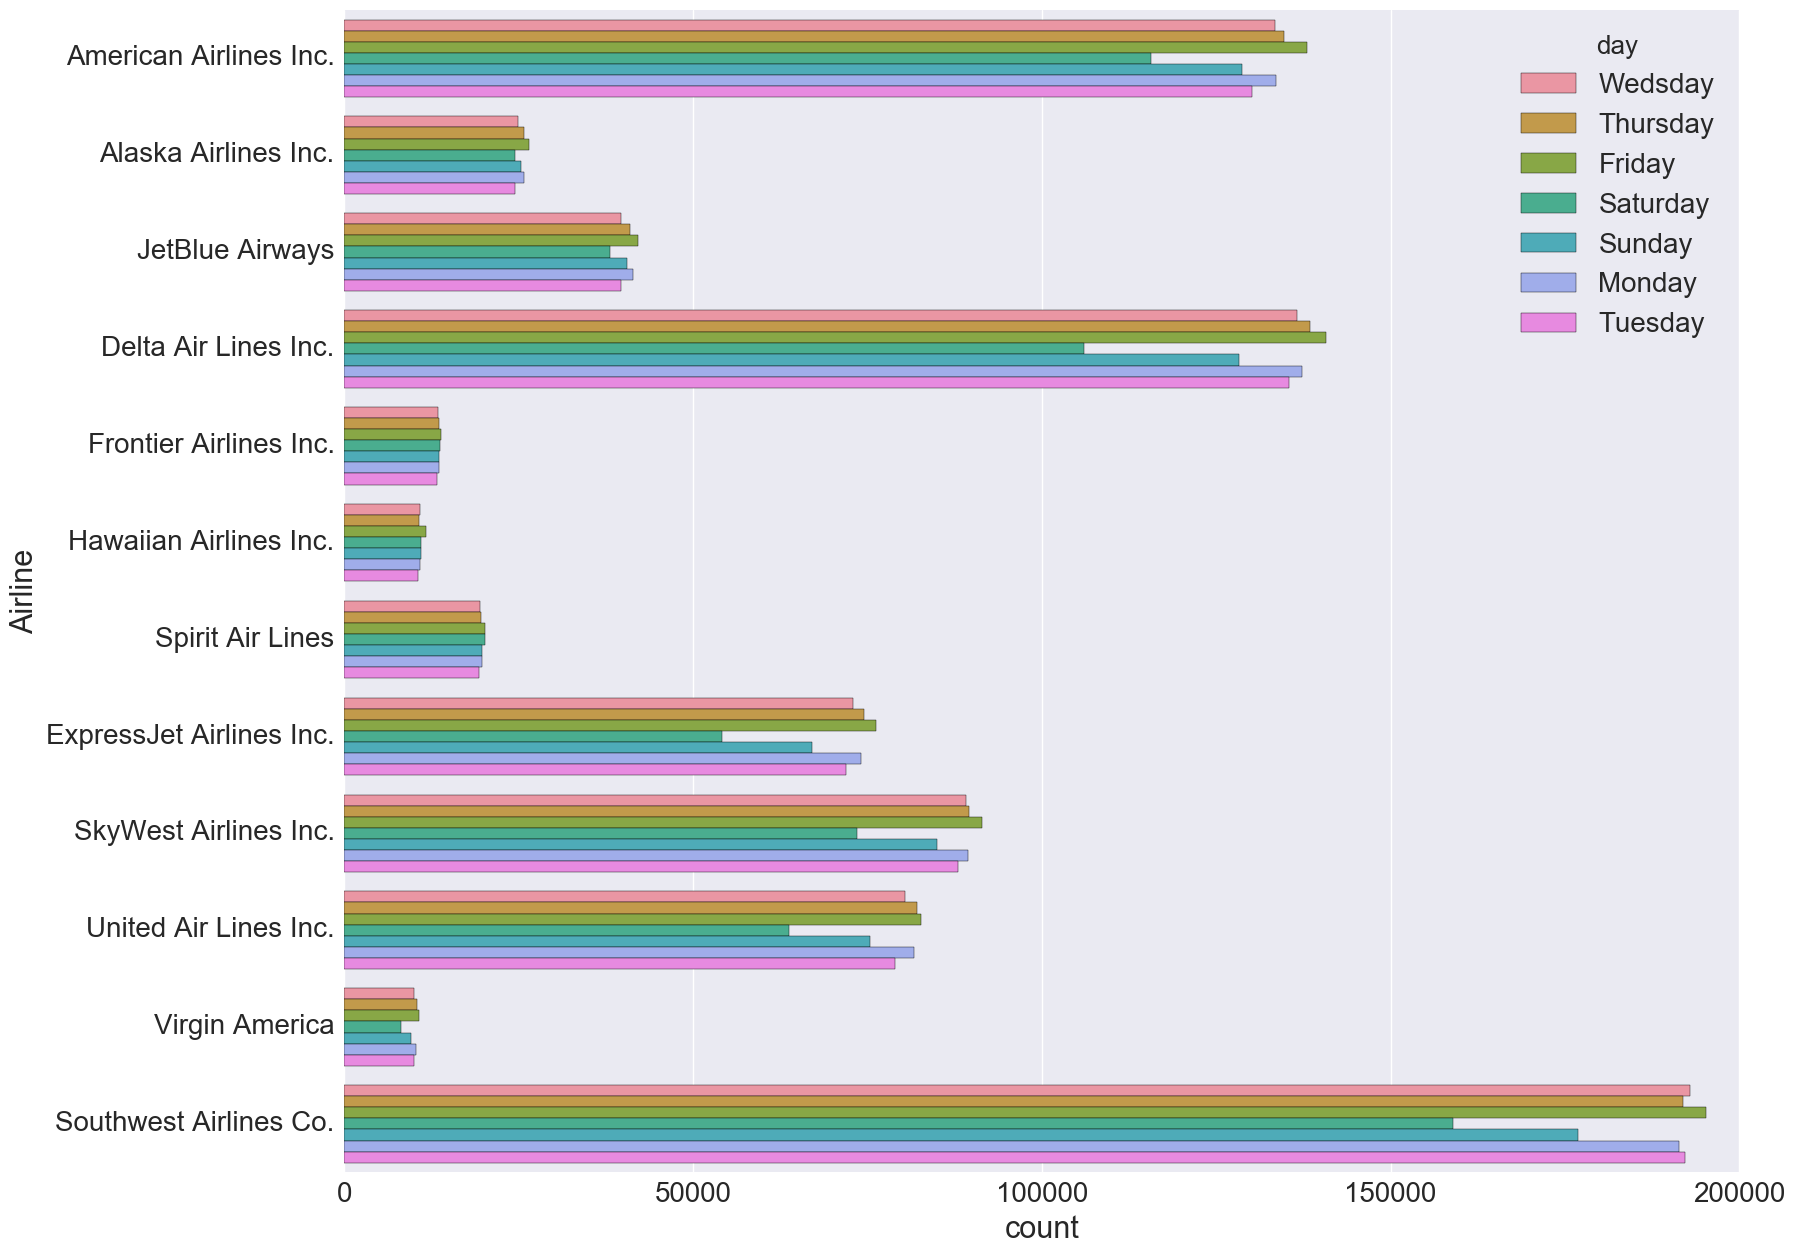

In [160]:
plt.figure(figsize=(18, 15))
ax = sns.countplot(y="Airline", hue='day', data=df)
plt.show()

In [161]:
col = ['FlightNum', 'Year', 'Month', 'Origin', 'Dest',
       'UniqueCarrier', 'ArrTime', 'DepTime', 'CRSArrTime', 'CRSDepTime',
       'CRSElapsedTime', 'ActualElapsedTime', 'ArrDelayMinutes',
       'DepDelayMinutes', 'OriginCityName', 'DestCityName','Airline','Status','day','OriginStateName','DestStateName']
data = df[col]

In [ ]:
data

In [166]:
def describeColumn(data):
    for col in data.columns:
        print("")
        print("DESCRIBING "+ col +":")
        print(data[col].describe())
describeColumn(data)


DESCRIBING FlightNum:
count    5.617658e+06
mean     2.078520e+03
std      1.700417e+03
min      1.000000e+00
25%      7.110000e+02
50%      1.639000e+03
75%      2.855000e+03
max      8.402000e+03
Name: FlightNum, dtype: float64

DESCRIBING Year:
count    5617658.0
mean        2016.0
std            0.0
min         2016.0
25%         2016.0
50%         2016.0
75%         2016.0
max         2016.0
Name: Year, dtype: float64

DESCRIBING Month:
count    5.617658e+06
mean     6.535810e+00
std      3.400847e+00
min      1.000000e+00
25%      4.000000e+00
50%      7.000000e+00
75%      9.000000e+00
max      1.200000e+01
Name: Month, dtype: float64

DESCRIBING Origin:
count     5617658
unique        313
top           ATL
freq       384375
Name: Origin, dtype: object

DESCRIBING Dest:
count     5617658
unique        310
top           ATL
freq       384252
Name: Dest, dtype: object

DESCRIBING UniqueCarrier:
count     5617658
unique         12
top            WN
freq      1299444
Name: UniqueCa

In [ ]:
# def jointDistribution(df):
#     columns=['FlightNum', 'Year', 'Month',
#        'UniqueCarrier', 'ArrTime', 'DepTime', 'CRSArrTime', 'CRSDepTime',
#        'CRSElapsedTime', 'ActualElapsedTime', 'ArrDelayMinutes',
#        'DepDelayMinutes','Airline','Status','day']
#     for col in columns:
#             print(col)
#             plt.figure(figsize=(12,12), dpi=100)
#             sns.set(font_scale = 1)
#             sns.jointplot(x=col, y='DepDelay', data=df, size=12, color=color[5]);
#             plt.show()
# jointDistribution(df)

In [184]:
df.columns

Index(['index', 'Year', 'DestCityMarketID', 'Dest', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac',
       'DestAirportSeqID', 'CRSDepTime', 'CRSArrTime', 'ArrTimeBlk',
       'Cancelled', 'Diverted', 'Flights', 'DistanceGroup',
       'DivAirportLandings', 'DepTimeBlk', 'DestAirportID', 'Distance',
       'OriginStateName', 'OriginWac', 'Month', 'DayofMonth', 'DayOfWeek',
       'FlightDate', 'UniqueCarrier', 'AirlineID', 'Carrier', 'Quarter',
       'Origin', 'OriginStateFips', 'OriginState', 'OriginCityName',
       'FlightNum', 'OriginCityMarketID', 'OriginAirportSeqID',
       'OriginAirportID', 'CRSElapsedTime', 'TailNum', 'DepTime', 'DepDelay',
       'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups', 'WheelsOff',
       'TaxiOut', 'TaxiIn', 'WheelsOn', 'ArrTime', 'ArrivalDelayGroups',
       'ActualElapsedTime', 'AirTime', 'ArrDel15', 'ArrDelayMinutes',
       'ArrDelay', 'SecurityDelay', 'LateAircraftDelay', 'WeatherDelay',
       'CarrierD

In [227]:
Time = df[['DepTime','CRSDepTime','DepDelayMinutes','DepDelay']]
Time['hour'] = df['CRSDepTime'].apply(lambda x: str(x)[:-2])

In [228]:
Time['CRSDepTime'][5617630].astype(str)[:-2]

'8'

In [232]:
Time.replace('', 0)
Time.hour.unique()

array(['11', '15', '7', '6', '18', '14', '17', '16', '13', '10', '20', '9',
       '19', '12', '22', '8', '23', '21', '5', '', '1', '2', '3', '4'], dtype=object)

In [ ]:
## Time.plot(x='hour',y='DepDelay')
plt.show()

In [258]:
h = Time[['DepDelay','hour']].groupby('hour').mean().reset_index()
h = h.replace('', 0)
h['hour'] = h['hour'].astype(int)
h = h.sort_values(by='hour')

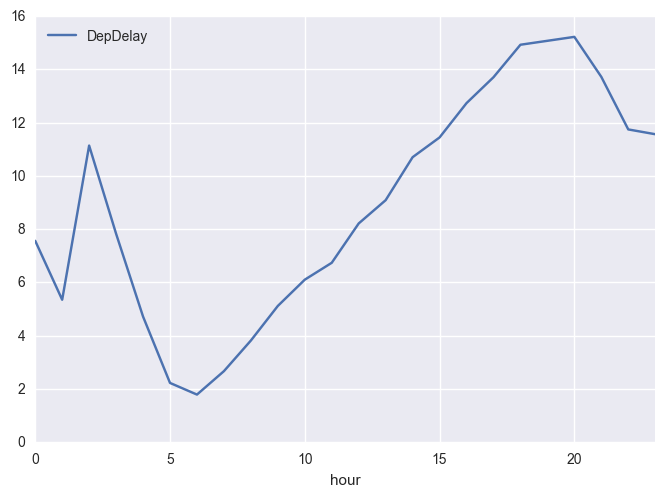

In [266]:
h.plot(x='hour',y='DepDelay')
plt.show()

In [ ]:
s = df.groupby("OriginCityName").agg({ "Origin": pd.Series.nunique})